In [20]:
! ls -1 preprocessed_GRN_files_all | wc -l 

633


In [1]:
import pandas as pd
import os
from tqdm import tqdm

In [3]:
!pwd

/cephyr/NOBACKUP/groups/naiss2023-23-453/stratified_GRN


In [49]:
!ls preprocessed_GRN_files_all/

01_120405.csv	299_120430.csv	492_120515.csv	680_120604.csv
02_120405.csv	29_120416.csv	493_120515.csv	681_120604.csv
03_120405.csv	300_120430.csv	494_120515.csv	682_120604.csv
04_120405.csv	302_120430.csv	495_120515.csv	683_120604.csv
05_120405.csv	303_120430.csv	496_120515.csv	684_120604.csv
07_120410.csv	304_120430.csv	497_120515.csv	685_120604.csv
08_120410.csv	305_120430.csv	498_120515.csv	687_120604.csv
100_120417.csv	306_120430.csv	500_120515.csv	688_120604.csv
101_120418.csv	307_120430.csv	501_120515.csv	689_120604.csv
102_120418.csv	309_120430.csv	502_120515.csv	68_120417.csv
103_120418.csv	30_120416.csv	505_120515.csv	690_120604.csv
104_120418.csv	310_120430.csv	506_120515.csv	691_120605.csv
108_120418.csv	312_120430.csv	507_120515.csv	693_120605.csv
109_120418.csv	314_120501.csv	508_120515.csv	694_120605.csv
111_120418.csv	315_120501.csv	509_120515.csv	695_120605.csv
112_120418.csv	318_120501.csv	510_120515.csv	697_120605.csv
113_120418.csv	321_120501.csv	511_120515.csv	698_1

In [50]:
data_x = pd.read_csv('preprocessed_GRN_files_all/101_120418.csv')

In [51]:
data_raw = pd.read_csv('../GRN_output/lioness.101_120418.8.csv')

In [73]:
len(data_x)

12073384

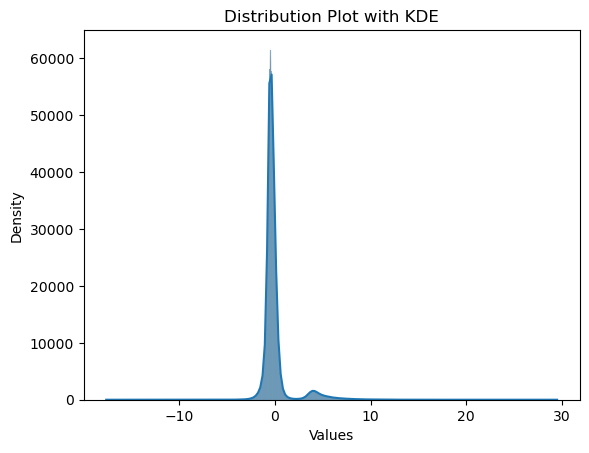

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a sample DataFrame


# Plot the distribution using Seaborn
sns.histplot(data=data_x ,x='Weights', kde=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution Plot with KDE')
plt.show()

In [68]:
data_x[data_x.Weights>0].sort_values(by = 'Weights',ascending = False)

,TF,Genes,Weights
5451123,ENSG00000153879,ENSG00000153132,2.948944e+01
11589557,ENSG00000221869,ENSG00000153132,2.931667e+01
5448479,ENSG00000153879,ENSG00000130770,2.897644e+01
11586913,ENSG00000221869,ENSG00000130770,2.888025e+01
5444590,ENSG00000153879,ENSG00000083307,2.866071e+01
...,...,...,...
5344395,ENSG00000152284,ENSG00000107371,7.862106e-07
10602858,ENSG00000197619,ENSG00000125304,7.096997e-07
7165628,ENSG00000170631,ENSG00000167173,6.061071e-07
2102405,ENSG00000111087,ENSG00000278725,7.764923e-08


In [53]:
data_raw.set_index('Unnamed: 0', inplace = True)


In [69]:
712*16000

11392000

In [ ]:
for i,j in data_x.iterrows():
    print(data_raw.loc[j.TF,j.Genes] == j.Weights)

In [58]:
data_x.sort_values(by = 'Weights', ascending = False).iloc[0:200000,:]

,TF,Genes,Weights
5451123,ENSG00000153879,ENSG00000153132,29.489439
11589557,ENSG00000221869,ENSG00000153132,29.316670
5448479,ENSG00000153879,ENSG00000130770,28.976439
11586913,ENSG00000221869,ENSG00000130770,28.880248
5444590,ENSG00000153879,ENSG00000083307,28.660710
...,...,...,...
1125392,ENSG00000088876,ENSG00000137720,5.442042
8161228,ENSG00000177551,ENSG00000126858,5.442030
7618257,ENSG00000172819,ENSG00000123411,5.442011
11498282,ENSG00000213762,ENSG00000084731,5.442002


In [74]:
for i in tqdm(os.listdir('./preprocessed_GRN_files_all/')):
    data = pd.read_csv('./preprocessed_GRN_files_all/'+i)
    data.sort_values(by = 'Weights', ascending = False)
    data = data[data.Weights > 0.0]
    print(len(data))
    data.to_csv('./preprocessed_GRN_files_all_positive/'+i, index =  False)

  0%|                                                   | 0/633 [00:00<?, ?it/s]

3794746


  0%|                                         | 1/633 [00:21<3:41:16, 21.01s/it]

2638434


  0%|▏                                        | 2/633 [00:36<3:07:02, 17.79s/it]

2730234


  0%|▏                                        | 3/633 [00:52<2:55:53, 16.75s/it]

2611110


  1%|▎                                        | 4/633 [01:08<2:55:54, 16.78s/it]

3173473


  1%|▎                                        | 5/633 [01:29<3:10:54, 18.24s/it]

3136409


  1%|▍                                        | 6/633 [01:50<3:20:02, 19.14s/it]

4130791


  1%|▍                                        | 7/633 [02:14<3:35:21, 20.64s/it]

3661790


  1%|▌                                        | 8/633 [02:32<3:26:26, 19.82s/it]

4604730


  1%|▌                                        | 9/633 [02:52<3:25:51, 19.79s/it]

2699800


  2%|▋                                       | 10/633 [03:07<3:12:30, 18.54s/it]

2407573


  2%|▋                                       | 11/633 [03:23<3:01:39, 17.52s/it]

2513087


  2%|▊                                       | 12/633 [03:38<2:55:54, 17.00s/it]

2613745


  2%|▊                                       | 13/633 [03:54<2:52:30, 16.69s/it]

2715506


  2%|▉                                       | 14/633 [04:10<2:49:20, 16.41s/it]

3638942


  2%|▉                                       | 15/633 [04:28<2:52:37, 16.76s/it]

2626286


  3%|█                                       | 16/633 [04:43<2:48:03, 16.34s/it]

3008787


  3%|█                                       | 17/633 [04:59<2:47:03, 16.27s/it]

2703431


  3%|█▏                                      | 18/633 [05:15<2:44:07, 16.01s/it]

2887305


  3%|█▏                                      | 19/633 [05:30<2:43:30, 15.98s/it]

2446265


  3%|█▎                                      | 20/633 [05:45<2:40:04, 15.67s/it]

5365284


  3%|█▎                                      | 21/633 [06:07<2:56:54, 17.34s/it]

2556478


  3%|█▍                                      | 22/633 [06:22<2:50:39, 16.76s/it]

2810133


  4%|█▍                                      | 23/633 [06:38<2:47:38, 16.49s/it]

3613090


  4%|█▌                                      | 24/633 [06:55<2:49:52, 16.74s/it]

3763235


  4%|█▌                                      | 25/633 [07:14<2:55:33, 17.32s/it]

2899622


  4%|█▋                                      | 26/633 [07:30<2:50:07, 16.82s/it]

2488800


  4%|█▋                                      | 27/633 [07:45<2:44:09, 16.25s/it]

2704366


  4%|█▊                                      | 28/633 [08:02<2:48:41, 16.73s/it]

2802185


  5%|█▊                                      | 29/633 [08:22<2:57:04, 17.59s/it]

3448808


  5%|█▉                                      | 30/633 [08:44<3:09:44, 18.88s/it]

5067673


  5%|█▉                                      | 31/633 [09:08<3:26:43, 20.60s/it]

3393040


  5%|██                                      | 32/633 [09:30<3:29:20, 20.90s/it]

2601342


  5%|██                                      | 33/633 [09:51<3:29:53, 20.99s/it]

3413490


  5%|██▏                                     | 34/633 [10:13<3:32:07, 21.25s/it]

3251268


  6%|██▏                                     | 35/633 [10:35<3:34:07, 21.48s/it]

2463216


  6%|██▎                                     | 36/633 [11:00<3:42:34, 22.37s/it]

2924651


  6%|██▎                                     | 37/633 [11:23<3:44:01, 22.55s/it]

2688935


  6%|██▍                                     | 38/633 [11:44<3:40:17, 22.21s/it]

2520984


  6%|██▍                                     | 39/633 [12:05<3:35:02, 21.72s/it]

2585889


  6%|██▌                                     | 40/633 [12:27<3:37:19, 21.99s/it]

3006785


  6%|██▌                                     | 41/633 [12:50<3:40:10, 22.31s/it]

4287191


  7%|██▋                                     | 42/633 [13:14<3:45:19, 22.88s/it]

2640575


  7%|██▋                                     | 43/633 [13:33<3:33:17, 21.69s/it]

3037507


  7%|██▊                                     | 44/633 [13:55<3:31:20, 21.53s/it]

2896613


  7%|██▊                                     | 45/633 [14:11<3:16:07, 20.01s/it]

2856068


  7%|██▉                                     | 46/633 [14:31<3:16:43, 20.11s/it]

3303510


  7%|██▉                                     | 47/633 [14:48<3:07:44, 19.22s/it]

2580295


  8%|███                                     | 48/633 [15:07<3:06:07, 19.09s/it]

2857766


  8%|███                                     | 49/633 [15:28<3:09:56, 19.51s/it]

3193773


  8%|███▏                                    | 50/633 [15:45<3:02:01, 18.73s/it]

2496615


  8%|███▏                                    | 51/633 [16:02<2:57:49, 18.33s/it]

2840162


  8%|███▎                                    | 52/633 [16:20<2:57:01, 18.28s/it]

2633809


  8%|███▎                                    | 53/633 [16:39<2:57:13, 18.33s/it]

3234805


  9%|███▍                                    | 54/633 [16:58<3:00:34, 18.71s/it]

2970323


  9%|███▍                                    | 55/633 [17:17<3:00:57, 18.78s/it]

3055107


  9%|███▌                                    | 56/633 [17:38<3:05:46, 19.32s/it]

3004243


  9%|███▌                                    | 57/633 [17:58<3:07:57, 19.58s/it]

2847132


  9%|███▋                                    | 58/633 [18:18<3:08:19, 19.65s/it]

3257775


  9%|███▋                                    | 59/633 [18:41<3:17:57, 20.69s/it]

2828971


  9%|███▊                                    | 60/633 [18:58<3:07:38, 19.65s/it]

2937345


 10%|███▊                                    | 61/633 [19:15<2:59:45, 18.86s/it]

3382644


 10%|███▉                                    | 62/633 [19:33<2:56:15, 18.52s/it]

2841325


 10%|███▉                                    | 63/633 [19:50<2:52:36, 18.17s/it]

2596482


 10%|████                                    | 64/633 [20:06<2:44:50, 17.38s/it]

2660631


 10%|████                                    | 65/633 [20:21<2:38:49, 16.78s/it]

2716058


 10%|████▏                                   | 66/633 [20:37<2:36:29, 16.56s/it]

3789317


 11%|████▏                                   | 67/633 [20:56<2:42:35, 17.24s/it]

4036334


 11%|████▎                                   | 68/633 [21:16<2:48:43, 17.92s/it]

2659263


 11%|████▎                                   | 69/633 [21:34<2:48:43, 17.95s/it]

2483288


 11%|████▍                                   | 70/633 [21:49<2:42:14, 17.29s/it]

3408143


 11%|████▍                                   | 71/633 [22:08<2:46:04, 17.73s/it]

2573834


 11%|████▌                                   | 72/633 [22:30<2:58:54, 19.13s/it]

2647717


 12%|████▌                                   | 73/633 [22:54<3:10:31, 20.41s/it]

3255906


 12%|████▋                                   | 74/633 [23:17<3:16:53, 21.13s/it]

3063356


 12%|████▋                                   | 75/633 [23:39<3:19:24, 21.44s/it]

3423459


 12%|████▊                                   | 76/633 [24:02<3:25:07, 22.10s/it]

2842667


 12%|████▊                                   | 77/633 [24:24<3:24:20, 22.05s/it]

3249975


 12%|████▉                                   | 78/633 [24:46<3:21:32, 21.79s/it]

3164613


 12%|████▉                                   | 79/633 [25:06<3:17:56, 21.44s/it]

2540977


 13%|█████                                   | 80/633 [25:26<3:11:41, 20.80s/it]

3021189


 13%|█████                                   | 81/633 [25:42<2:58:43, 19.43s/it]

3059015


 13%|█████▏                                  | 82/633 [25:58<2:50:14, 18.54s/it]

4247811


 13%|█████▏                                  | 83/633 [26:20<2:59:17, 19.56s/it]

3083829


 13%|█████▎                                  | 84/633 [26:39<2:56:37, 19.30s/it]

2591392


 13%|█████▎                                  | 85/633 [26:56<2:50:52, 18.71s/it]

2722317


 14%|█████▍                                  | 86/633 [27:14<2:48:43, 18.51s/it]

2958740


 14%|█████▍                                  | 87/633 [27:33<2:49:29, 18.62s/it]

3801221


 14%|█████▌                                  | 88/633 [27:54<2:54:17, 19.19s/it]

2560043


 14%|█████▌                                  | 89/633 [28:12<2:51:33, 18.92s/it]

2556668


 14%|█████▋                                  | 90/633 [28:30<2:49:56, 18.78s/it]

2795903


 14%|█████▊                                  | 91/633 [28:50<2:52:16, 19.07s/it]

2706682


 15%|█████▊                                  | 92/633 [29:09<2:52:13, 19.10s/it]

2563259


 15%|█████▉                                  | 93/633 [29:28<2:51:33, 19.06s/it]

2906941


 15%|█████▉                                  | 94/633 [29:48<2:52:52, 19.24s/it]

2992454


 15%|██████                                  | 95/633 [30:08<2:54:11, 19.43s/it]

2699351


 15%|██████                                  | 96/633 [30:27<2:53:00, 19.33s/it]

2528951


 15%|██████▏                                 | 97/633 [30:46<2:50:52, 19.13s/it]

3203945


 15%|██████▏                                 | 98/633 [31:06<2:53:16, 19.43s/it]

2532235


 16%|██████▎                                 | 99/633 [31:24<2:50:47, 19.19s/it]

2545000


 16%|██████▏                                | 100/633 [31:43<2:50:16, 19.17s/it]

2667487


 16%|██████▏                                | 101/633 [32:02<2:49:16, 19.09s/it]

3333382


 16%|██████▎                                | 102/633 [32:23<2:53:16, 19.58s/it]

2788283


 16%|██████▎                                | 103/633 [32:42<2:52:18, 19.51s/it]

2944468


 16%|██████▍                                | 104/633 [33:02<2:51:29, 19.45s/it]

2435784


 17%|██████▍                                | 105/633 [33:21<2:49:34, 19.27s/it]

6479785


 17%|██████▌                                | 106/633 [33:48<3:09:58, 21.63s/it]

3656304


 17%|██████▌                                | 107/633 [34:12<3:17:14, 22.50s/it]

3915685


 17%|██████▋                                | 108/633 [34:31<3:06:11, 21.28s/it]

3022752


 17%|██████▋                                | 109/633 [34:47<2:53:27, 19.86s/it]

2857620


 17%|██████▊                                | 110/633 [35:04<2:45:06, 18.94s/it]

2576891


 18%|██████▊                                | 111/633 [35:22<2:41:11, 18.53s/it]

3338026


 18%|██████▉                                | 112/633 [35:39<2:37:26, 18.13s/it]

2864439


 18%|██████▉                                | 113/633 [35:56<2:35:32, 17.95s/it]

2968696


 18%|███████                                | 114/633 [36:14<2:35:07, 17.93s/it]

2514526


 18%|███████                                | 115/633 [36:32<2:33:39, 17.80s/it]

3082273


 18%|███████▏                               | 116/633 [36:50<2:34:15, 17.90s/it]

2648682


 18%|███████▏                               | 117/633 [37:10<2:40:06, 18.62s/it]

3103539


 19%|███████▎                               | 118/633 [37:29<2:39:39, 18.60s/it]

2854873


 19%|███████▎                               | 119/633 [37:49<2:44:10, 19.16s/it]

3213856


 19%|███████▍                               | 120/633 [38:08<2:42:04, 18.96s/it]

2700885


 19%|███████▍                               | 121/633 [38:25<2:36:55, 18.39s/it]

2483217


 19%|███████▌                               | 122/633 [38:40<2:29:43, 17.58s/it]

3245135


 19%|███████▌                               | 123/633 [38:59<2:31:27, 17.82s/it]

3736155


 20%|███████▋                               | 124/633 [39:20<2:39:12, 18.77s/it]

2666650


 20%|███████▋                               | 125/633 [39:38<2:36:47, 18.52s/it]

3280696


 20%|███████▊                               | 126/633 [39:56<2:35:13, 18.37s/it]

3172672


 20%|███████▊                               | 127/633 [40:15<2:37:08, 18.63s/it]

2607015


 20%|███████▉                               | 128/633 [40:32<2:33:27, 18.23s/it]

3759724


 20%|███████▉                               | 129/633 [40:51<2:34:14, 18.36s/it]

3101337


 21%|████████                               | 130/633 [41:10<2:34:41, 18.45s/it]

3348538


 21%|████████                               | 131/633 [41:29<2:37:13, 18.79s/it]

3004243


 21%|████████▏                              | 132/633 [41:47<2:35:28, 18.62s/it]

3511863


 21%|████████▏                              | 133/633 [42:06<2:36:25, 18.77s/it]

3220697


 21%|████████▎                              | 134/633 [42:25<2:35:49, 18.74s/it]

2451270


 21%|████████▎                              | 135/633 [42:42<2:31:30, 18.25s/it]

2670504


 21%|████████▍                              | 136/633 [42:59<2:27:12, 17.77s/it]

2900683


 22%|████████▍                              | 137/633 [43:16<2:25:48, 17.64s/it]

3148191


 22%|████████▌                              | 138/633 [43:36<2:29:59, 18.18s/it]

2638579


 22%|████████▌                              | 139/633 [43:56<2:34:52, 18.81s/it]

2649018


 22%|████████▋                              | 140/633 [44:16<2:38:17, 19.27s/it]

2463216


 22%|████████▋                              | 141/633 [44:36<2:38:05, 19.28s/it]

3251268


 22%|████████▋                              | 142/633 [44:57<2:42:31, 19.86s/it]

2761077


 23%|████████▊                              | 143/633 [45:17<2:42:07, 19.85s/it]

3095904


 23%|████████▊                              | 144/633 [45:37<2:43:02, 20.01s/it]

3413490


 23%|████████▉                              | 145/633 [45:59<2:47:05, 20.54s/it]

2676828


 23%|████████▉                              | 146/633 [46:18<2:44:24, 20.26s/it]

4293162


 23%|█████████                              | 147/633 [46:42<2:51:33, 21.18s/it]

3025169


 23%|█████████                              | 148/633 [47:02<2:49:56, 21.02s/it]

2868978


 24%|█████████▏                             | 149/633 [47:22<2:47:04, 20.71s/it]

2797872


 24%|█████████▏                             | 150/633 [47:43<2:45:24, 20.55s/it]

3014942


 24%|█████████▎                             | 151/633 [48:03<2:44:25, 20.47s/it]

2473901


 24%|█████████▎                             | 152/633 [48:22<2:41:35, 20.16s/it]

2492768


 24%|█████████▍                             | 153/633 [48:41<2:38:20, 19.79s/it]

3151778


 24%|█████████▍                             | 154/633 [49:02<2:39:42, 20.00s/it]

3246536


 24%|█████████▌                             | 155/633 [49:23<2:42:28, 20.40s/it]

3940429


 25%|█████████▌                             | 156/633 [49:44<2:44:43, 20.72s/it]

2544223


 25%|█████████▋                             | 157/633 [50:07<2:48:13, 21.20s/it]

2619874


 25%|█████████▋                             | 158/633 [50:26<2:42:51, 20.57s/it]

2849128


 25%|█████████▊                             | 159/633 [50:45<2:39:15, 20.16s/it]

2489072


 25%|█████████▊                             | 160/633 [51:00<2:27:25, 18.70s/it]

2966544


 25%|█████████▉                             | 161/633 [51:18<2:24:48, 18.41s/it]

2598398


 26%|█████████▉                             | 162/633 [51:37<2:26:26, 18.66s/it]

2601342


 26%|██████████                             | 163/633 [51:57<2:27:43, 18.86s/it]

3393040


 26%|██████████                             | 164/633 [52:16<2:28:37, 19.01s/it]

4409890


 26%|██████████▏                            | 165/633 [52:36<2:30:06, 19.24s/it]

5067673


 26%|██████████▏                            | 166/633 [53:01<2:42:36, 20.89s/it]

2403166


 26%|██████████▎                            | 167/633 [53:16<2:29:57, 19.31s/it]

3069051


 27%|██████████▎                            | 168/633 [53:33<2:23:40, 18.54s/it]

2771657


 27%|██████████▍                            | 169/633 [53:49<2:18:21, 17.89s/it]

3393605


 27%|██████████▍                            | 170/633 [54:07<2:16:30, 17.69s/it]

2835596


 27%|██████████▌                            | 171/633 [54:23<2:12:17, 17.18s/it]

4023559


 27%|██████████▌                            | 172/633 [54:47<2:28:03, 19.27s/it]

3283399


 27%|██████████▋                            | 173/633 [55:04<2:23:40, 18.74s/it]

3569996


 27%|██████████▋                            | 174/633 [55:22<2:22:05, 18.57s/it]

3098225


 28%|██████████▊                            | 175/633 [55:39<2:17:11, 17.97s/it]

3763235


 28%|██████████▊                            | 176/633 [55:57<2:18:03, 18.13s/it]

3691071


 28%|██████████▉                            | 177/633 [56:15<2:17:21, 18.07s/it]

2588204


 28%|██████████▉                            | 178/633 [56:31<2:11:48, 17.38s/it]

3613090


 28%|███████████                            | 179/633 [56:49<2:13:23, 17.63s/it]

2810133


 28%|███████████                            | 180/633 [57:06<2:11:46, 17.45s/it]

3379363


 29%|███████████▏                           | 181/633 [57:24<2:11:57, 17.52s/it]

2477367


 29%|███████████▏                           | 182/633 [57:41<2:09:30, 17.23s/it]

3388489


 29%|███████████▎                           | 183/633 [57:58<2:09:27, 17.26s/it]

4944316


 29%|███████████▎                           | 184/633 [58:21<2:22:56, 19.10s/it]

2556478


 29%|███████████▍                           | 185/633 [58:38<2:16:52, 18.33s/it]

3224485


 29%|███████████▍                           | 186/633 [58:55<2:13:02, 17.86s/it]

3782457


 30%|███████████▌                           | 187/633 [59:14<2:15:37, 18.25s/it]

3732399


 30%|███████████▌                           | 188/633 [59:34<2:19:06, 18.76s/it]

2589630


 30%|███████████▋                           | 189/633 [59:52<2:17:00, 18.51s/it]

5365284


 30%|███████████                          | 190/633 [1:00:14<2:25:51, 19.76s/it]

3182184


 30%|███████████▏                         | 191/633 [1:00:34<2:24:58, 19.68s/it]

2789895


 30%|███████████▏                         | 192/633 [1:00:55<2:27:28, 20.07s/it]

3122685


 30%|███████████▎                         | 193/633 [1:01:12<2:21:36, 19.31s/it]

3161684


 31%|███████████▎                         | 194/633 [1:01:33<2:23:38, 19.63s/it]

3745887


 31%|███████████▍                         | 195/633 [1:01:52<2:23:16, 19.63s/it]

2883072


 31%|███████████▍                         | 196/633 [1:02:13<2:25:46, 20.01s/it]

3222972


 31%|███████████▌                         | 197/633 [1:02:32<2:23:42, 19.78s/it]

2941586


 31%|███████████▌                         | 198/633 [1:02:56<2:31:50, 20.94s/it]

3024248


 31%|███████████▋                         | 199/633 [1:03:19<2:36:12, 21.60s/it]

4151370


 32%|███████████▋                         | 200/633 [1:03:45<2:43:45, 22.69s/it]

2695687


 32%|███████████▋                         | 201/633 [1:04:04<2:35:42, 21.63s/it]

2616161


 32%|███████████▊                         | 202/633 [1:04:20<2:24:24, 20.10s/it]

2915454


 32%|███████████▊                         | 203/633 [1:04:42<2:27:36, 20.60s/it]

2592579


 32%|███████████▉                         | 204/633 [1:04:58<2:16:33, 19.10s/it]

3698973


 32%|███████████▉                         | 205/633 [1:05:16<2:13:49, 18.76s/it]

3167613


 33%|████████████                         | 206/633 [1:05:33<2:09:51, 18.25s/it]

2517912


 33%|████████████                         | 207/633 [1:05:48<2:04:15, 17.50s/it]

2970323


 33%|████████████▏                        | 208/633 [1:06:05<2:03:01, 17.37s/it]

3234805


 33%|████████████▏                        | 209/633 [1:06:24<2:04:51, 17.67s/it]

2633809


 33%|████████████▎                        | 210/633 [1:06:40<2:02:00, 17.31s/it]

2840162


 33%|████████████▎                        | 211/633 [1:06:57<1:59:54, 17.05s/it]

2496615


 33%|████████████▍                        | 212/633 [1:07:14<1:59:20, 17.01s/it]

2753917


 34%|████████████▍                        | 213/633 [1:07:30<1:56:51, 16.69s/it]

2524482


 34%|████████████▌                        | 214/633 [1:07:45<1:53:37, 16.27s/it]

3024196


 34%|████████████▌                        | 215/633 [1:08:01<1:54:06, 16.38s/it]

2661585


 34%|████████████▋                        | 216/633 [1:08:20<1:57:44, 16.94s/it]

4011595


 34%|████████████▋                        | 217/633 [1:08:40<2:03:39, 17.84s/it]

2788214


 34%|████████████▋                        | 218/633 [1:08:58<2:04:30, 18.00s/it]

3774551


 35%|████████████▊                        | 219/633 [1:09:17<2:05:59, 18.26s/it]

3193773


 35%|████████████▊                        | 220/633 [1:09:37<2:09:51, 18.87s/it]

2857766


 35%|████████████▉                        | 221/633 [1:09:58<2:13:32, 19.45s/it]

2519000


 35%|████████████▉                        | 222/633 [1:10:15<2:09:01, 18.84s/it]

2580295


 35%|█████████████                        | 223/633 [1:10:31<2:03:04, 18.01s/it]

3180617


 35%|█████████████                        | 224/633 [1:10:49<2:01:29, 17.82s/it]

3011476


 36%|█████████████▏                       | 225/633 [1:11:08<2:03:00, 18.09s/it]

2900254


 36%|█████████████▏                       | 226/633 [1:11:26<2:03:21, 18.18s/it]

2771762


 36%|█████████████▎                       | 227/633 [1:11:44<2:02:15, 18.07s/it]

2968885


 36%|█████████████▎                       | 228/633 [1:12:01<2:00:29, 17.85s/it]

2990413


 36%|█████████████▍                       | 229/633 [1:12:20<2:02:09, 18.14s/it]

3054535


 36%|█████████████▍                       | 230/633 [1:12:39<2:04:41, 18.56s/it]

3179107


 36%|█████████████▌                       | 231/633 [1:12:59<2:07:03, 18.96s/it]

2597900


 37%|█████████████▌                       | 232/633 [1:13:23<2:15:32, 20.28s/it]

3303510


 37%|█████████████▌                       | 233/633 [1:13:44<2:16:20, 20.45s/it]

2496172


 37%|█████████████▋                       | 234/633 [1:14:03<2:12:58, 20.00s/it]

3396300


 37%|█████████████▋                       | 235/633 [1:14:25<2:18:12, 20.84s/it]

3019439


 37%|█████████████▊                       | 236/633 [1:14:44<2:14:10, 20.28s/it]

3166114


 37%|█████████████▊                       | 237/633 [1:15:04<2:12:35, 20.09s/it]

2856068


 38%|█████████████▉                       | 238/633 [1:15:23<2:11:03, 19.91s/it]

2896613


 38%|█████████████▉                       | 239/633 [1:15:41<2:06:58, 19.34s/it]

3037507


 38%|██████████████                       | 240/633 [1:16:00<2:05:21, 19.14s/it]

2640575


 38%|██████████████                       | 241/633 [1:16:20<2:05:34, 19.22s/it]

4287191


 38%|██████████████▏                      | 242/633 [1:16:39<2:05:12, 19.21s/it]

2952234


 38%|██████████████▏                      | 243/633 [1:16:56<2:01:47, 18.74s/it]

3279198


 39%|██████████████▎                      | 244/633 [1:17:15<2:00:40, 18.61s/it]

2745087


 39%|██████████████▎                      | 245/633 [1:17:32<1:57:45, 18.21s/it]

3006785


 39%|██████████████▍                      | 246/633 [1:17:49<1:55:02, 17.84s/it]

2585889


 39%|██████████████▍                      | 247/633 [1:18:06<1:53:04, 17.58s/it]

2480537


 39%|██████████████▍                      | 248/633 [1:18:21<1:48:21, 16.89s/it]

3261514


 39%|██████████████▌                      | 249/633 [1:18:39<1:49:01, 17.04s/it]

2935755


 39%|██████████████▌                      | 250/633 [1:18:57<1:51:17, 17.44s/it]

3204831


 40%|██████████████▋                      | 251/633 [1:19:15<1:52:05, 17.61s/it]

2924651


 40%|██████████████▋                      | 252/633 [1:19:33<1:52:02, 17.64s/it]

2779517


 40%|██████████████▊                      | 253/633 [1:19:50<1:50:35, 17.46s/it]

4970024


 40%|██████████████▊                      | 254/633 [1:20:10<1:55:57, 18.36s/it]

2520984


 40%|██████████████▉                      | 255/633 [1:20:27<1:52:21, 17.83s/it]

2688935


 40%|██████████████▉                      | 256/633 [1:20:42<1:48:00, 17.19s/it]

2979813


 41%|███████████████                      | 257/633 [1:21:00<1:47:36, 17.17s/it]

2748933


 41%|███████████████                      | 258/633 [1:21:18<1:48:49, 17.41s/it]

3534410


 41%|███████████████▏                     | 259/633 [1:21:36<1:50:12, 17.68s/it]

2635865


 41%|███████████████▏                     | 260/633 [1:21:53<1:49:02, 17.54s/it]

2825665


 41%|███████████████▎                     | 261/633 [1:22:10<1:47:01, 17.26s/it]

2590629


 41%|███████████████▎                     | 262/633 [1:22:27<1:46:51, 17.28s/it]

2691018


 42%|███████████████▎                     | 263/633 [1:22:44<1:45:30, 17.11s/it]

2666575


 42%|███████████████▍                     | 264/633 [1:23:00<1:43:04, 16.76s/it]

2514249


 42%|███████████████▍                     | 265/633 [1:23:16<1:42:11, 16.66s/it]

3448808


 42%|███████████████▌                     | 266/633 [1:23:38<1:52:16, 18.36s/it]

3364963


 42%|███████████████▌                     | 267/633 [1:23:59<1:56:58, 19.18s/it]

3143083


 42%|███████████████▋                     | 268/633 [1:24:21<2:00:15, 19.77s/it]

2732490


 42%|███████████████▋                     | 269/633 [1:24:37<1:54:35, 18.89s/it]

3229747


 43%|███████████████▊                     | 270/633 [1:24:54<1:50:25, 18.25s/it]

2648958


 43%|███████████████▊                     | 271/633 [1:25:11<1:47:28, 17.81s/it]

2812699


 43%|███████████████▉                     | 272/633 [1:25:27<1:43:53, 17.27s/it]

2640616


 43%|███████████████▉                     | 273/633 [1:25:43<1:40:33, 16.76s/it]

3115848


 43%|████████████████                     | 274/633 [1:25:59<1:39:50, 16.69s/it]

3186155


 43%|████████████████                     | 275/633 [1:26:21<1:48:24, 18.17s/it]

4566932


 44%|████████████████▏                    | 276/633 [1:26:46<2:00:57, 20.33s/it]

3280063


 44%|████████████████▏                    | 277/633 [1:27:03<1:54:30, 19.30s/it]

2751864


 44%|████████████████▏                    | 278/633 [1:27:20<1:50:00, 18.59s/it]

2802185


 44%|████████████████▎                    | 279/633 [1:27:36<1:45:10, 17.83s/it]

2704366


 44%|████████████████▎                    | 280/633 [1:27:52<1:41:34, 17.27s/it]

2488800


 44%|████████████████▍                    | 281/633 [1:28:08<1:38:48, 16.84s/it]

3000775


 45%|████████████████▍                    | 282/633 [1:28:24<1:37:27, 16.66s/it]

2719646


 45%|████████████████▌                    | 283/633 [1:28:41<1:37:36, 16.73s/it]

2609969


 45%|████████████████▌                    | 284/633 [1:28:57<1:35:35, 16.43s/it]

2843258


 45%|████████████████▋                    | 285/633 [1:29:13<1:35:32, 16.47s/it]

2535687


 45%|████████████████▋                    | 286/633 [1:29:30<1:36:25, 16.67s/it]

2820172


 45%|████████████████▊                    | 287/633 [1:29:48<1:37:41, 16.94s/it]

2668382


 45%|████████████████▊                    | 288/633 [1:30:06<1:39:17, 17.27s/it]

2543658


 46%|████████████████▉                    | 289/633 [1:30:22<1:37:16, 16.97s/it]

2938996


 46%|████████████████▉                    | 290/633 [1:30:39<1:37:27, 17.05s/it]

2885195


 46%|█████████████████                    | 291/633 [1:30:58<1:39:34, 17.47s/it]

3451141


 46%|█████████████████                    | 292/633 [1:31:17<1:41:57, 17.94s/it]

3071800


 46%|█████████████████▏                   | 293/633 [1:31:35<1:42:23, 18.07s/it]

2899622


 46%|█████████████████▏                   | 294/633 [1:31:56<1:45:53, 18.74s/it]

2580302


 47%|█████████████████▏                   | 295/633 [1:32:16<1:47:50, 19.14s/it]

3435546


 47%|█████████████████▎                   | 296/633 [1:32:38<1:52:35, 20.05s/it]

3751472


 47%|█████████████████▎                   | 297/633 [1:33:03<2:00:08, 21.45s/it]

2594640


 47%|█████████████████▍                   | 298/633 [1:33:22<1:56:19, 20.83s/it]

2761288


 47%|█████████████████▍                   | 299/633 [1:33:41<1:52:38, 20.23s/it]

3992139


 47%|█████████████████▌                   | 300/633 [1:34:02<1:54:18, 20.60s/it]

3319023


 48%|█████████████████▌                   | 301/633 [1:34:23<1:53:59, 20.60s/it]

3009882


 48%|█████████████████▋                   | 302/633 [1:34:43<1:52:20, 20.36s/it]

2688105


 48%|█████████████████▋                   | 303/633 [1:35:02<1:49:46, 19.96s/it]

3147019


 48%|█████████████████▊                   | 304/633 [1:35:22<1:49:33, 19.98s/it]

2864800


 48%|█████████████████▊                   | 305/633 [1:35:41<1:48:36, 19.87s/it]

2547254


 48%|█████████████████▉                   | 306/633 [1:36:00<1:46:08, 19.48s/it]

2929657


 48%|█████████████████▉                   | 307/633 [1:36:20<1:46:22, 19.58s/it]

2446265


 49%|██████████████████                   | 308/633 [1:36:38<1:44:27, 19.28s/it]

2589386


 49%|██████████████████                   | 309/633 [1:36:57<1:43:02, 19.08s/it]

3243163


 49%|██████████████████                   | 310/633 [1:37:17<1:44:35, 19.43s/it]

3036456


 49%|██████████████████▏                  | 311/633 [1:37:37<1:45:35, 19.68s/it]

2911322


 49%|██████████████████▏                  | 312/633 [1:37:57<1:44:38, 19.56s/it]

2977040


 49%|██████████████████▎                  | 313/633 [1:38:17<1:45:28, 19.78s/it]

3194040


 50%|██████████████████▎                  | 314/633 [1:38:37<1:45:02, 19.76s/it]

2650219


 50%|██████████████████▍                  | 315/633 [1:38:56<1:43:17, 19.49s/it]

2887305


 50%|██████████████████▍                  | 316/633 [1:39:15<1:42:49, 19.46s/it]

3439799


 50%|██████████████████▌                  | 317/633 [1:39:36<1:44:43, 19.88s/it]

3024238


 50%|██████████████████▌                  | 318/633 [1:39:56<1:44:51, 19.97s/it]

4934942


 50%|██████████████████▋                  | 319/633 [1:40:21<1:51:41, 21.34s/it]

2513087


 51%|██████████████████▋                  | 320/633 [1:40:39<1:47:05, 20.53s/it]

2703431


 51%|██████████████████▊                  | 321/633 [1:40:58<1:43:20, 19.87s/it]

3008787


 51%|██████████████████▊                  | 322/633 [1:41:17<1:42:44, 19.82s/it]

2626286


 51%|██████████████████▉                  | 323/633 [1:41:34<1:37:19, 18.84s/it]

3638942


 51%|██████████████████▉                  | 324/633 [1:41:55<1:40:23, 19.49s/it]

2715506


 51%|██████████████████▉                  | 325/633 [1:42:14<1:39:09, 19.32s/it]

2613745


 52%|███████████████████                  | 326/633 [1:42:33<1:38:11, 19.19s/it]

2407573


 52%|███████████████████                  | 327/633 [1:42:53<1:39:03, 19.42s/it]

2699800


 52%|███████████████████▏                 | 328/633 [1:43:12<1:38:16, 19.33s/it]

4604730


 52%|███████████████████▏                 | 329/633 [1:43:35<1:44:33, 20.64s/it]

2817399


 52%|███████████████████▎                 | 330/633 [1:43:55<1:42:18, 20.26s/it]

3661790


 52%|███████████████████▎                 | 331/633 [1:44:17<1:44:24, 20.74s/it]

4130791


 52%|███████████████████▍                 | 332/633 [1:44:39<1:46:06, 21.15s/it]

3136409


 53%|███████████████████▍                 | 333/633 [1:44:59<1:44:21, 20.87s/it]

3173473


 53%|███████████████████▌                 | 334/633 [1:45:19<1:42:32, 20.58s/it]

2611110


 53%|███████████████████▌                 | 335/633 [1:45:38<1:39:42, 20.07s/it]

2730234


 53%|███████████████████▋                 | 336/633 [1:45:57<1:38:31, 19.90s/it]

2638434


 53%|███████████████████▋                 | 337/633 [1:46:16<1:36:51, 19.63s/it]

3794746


 53%|███████████████████▊                 | 338/633 [1:46:37<1:38:54, 20.12s/it]

2817399


 54%|███████████████████▊                 | 339/633 [1:46:57<1:38:14, 20.05s/it]

4934942


 54%|███████████████████▊                 | 340/633 [1:47:22<1:45:15, 21.55s/it]

3024238


 54%|███████████████████▉                 | 341/633 [1:47:42<1:42:20, 21.03s/it]

3243163


 54%|███████████████████▉                 | 342/633 [1:47:59<1:35:38, 19.72s/it]

3439799


 54%|████████████████████                 | 343/633 [1:48:17<1:33:19, 19.31s/it]

2650219


 54%|████████████████████                 | 344/633 [1:48:34<1:29:09, 18.51s/it]

3194040


 55%|████████████████████▏                | 345/633 [1:48:50<1:26:03, 17.93s/it]

2977040


 55%|████████████████████▏                | 346/633 [1:49:08<1:25:07, 17.80s/it]

2911322


 55%|████████████████████▎                | 347/633 [1:49:26<1:24:50, 17.80s/it]

3036456


 55%|████████████████████▎                | 348/633 [1:49:43<1:24:14, 17.74s/it]

2589386


 55%|████████████████████▍                | 349/633 [1:50:00<1:22:08, 17.35s/it]

2929657


 55%|████████████████████▍                | 350/633 [1:50:16<1:20:10, 17.00s/it]

2547254


 55%|████████████████████▌                | 351/633 [1:50:32<1:19:00, 16.81s/it]

2864800


 56%|████████████████████▌                | 352/633 [1:50:48<1:17:13, 16.49s/it]

3147019


 56%|████████████████████▋                | 353/633 [1:51:06<1:18:52, 16.90s/it]

4151370


 56%|████████████████████▋                | 354/633 [1:51:26<1:22:40, 17.78s/it]

3024248


 56%|████████████████████▊                | 355/633 [1:51:44<1:22:22, 17.78s/it]

2883072


 56%|████████████████████▊                | 356/633 [1:52:01<1:21:42, 17.70s/it]

2941586


 56%|████████████████████▊                | 357/633 [1:52:19<1:21:37, 17.74s/it]

3222972


 57%|████████████████████▉                | 358/633 [1:52:37<1:21:53, 17.87s/it]

3745887


 57%|████████████████████▉                | 359/633 [1:52:56<1:23:39, 18.32s/it]

3161684


 57%|█████████████████████                | 360/633 [1:53:14<1:22:53, 18.22s/it]

3732399


 57%|█████████████████████                | 361/633 [1:53:34<1:23:47, 18.48s/it]

3122685


 57%|█████████████████████▏               | 362/633 [1:53:52<1:23:10, 18.42s/it]

2789895


 57%|█████████████████████▏               | 363/633 [1:54:09<1:21:39, 18.15s/it]

3182184


 58%|█████████████████████▎               | 364/633 [1:54:26<1:19:49, 17.80s/it]

2589630


 58%|█████████████████████▎               | 365/633 [1:54:44<1:18:51, 17.66s/it]

2477367


 58%|█████████████████████▍               | 366/633 [1:54:59<1:15:31, 16.97s/it]

3782457


 58%|█████████████████████▍               | 367/633 [1:55:17<1:16:40, 17.29s/it]

3224485


 58%|█████████████████████▌               | 368/633 [1:55:35<1:17:47, 17.61s/it]

4944316


 58%|█████████████████████▌               | 369/633 [1:55:58<1:24:10, 19.13s/it]

3388489


 58%|█████████████████████▋               | 370/633 [1:56:17<1:23:43, 19.10s/it]

3379363


 59%|█████████████████████▋               | 371/633 [1:56:36<1:23:04, 19.02s/it]

2588204


 59%|█████████████████████▋               | 372/633 [1:56:53<1:20:16, 18.45s/it]

3691071


 59%|█████████████████████▊               | 373/633 [1:57:12<1:20:21, 18.54s/it]

3098225


 59%|█████████████████████▊               | 374/633 [1:57:30<1:19:26, 18.40s/it]

3569996


 59%|█████████████████████▉               | 375/633 [1:57:49<1:19:53, 18.58s/it]

3283399


 59%|█████████████████████▉               | 376/633 [1:58:07<1:19:11, 18.49s/it]

3069051


 60%|██████████████████████               | 377/633 [1:58:25<1:18:16, 18.35s/it]

4023559


 60%|██████████████████████               | 378/633 [1:58:45<1:19:59, 18.82s/it]

2835596


 60%|██████████████████████▏              | 379/633 [1:59:03<1:18:05, 18.45s/it]

3393605


 60%|██████████████████████▏              | 380/633 [1:59:22<1:18:19, 18.57s/it]

2771657


 60%|██████████████████████▎              | 381/633 [1:59:40<1:17:53, 18.55s/it]

3319023


 60%|██████████████████████▎              | 382/633 [1:59:58<1:16:54, 18.39s/it]

2688105


 61%|██████████████████████▍              | 383/633 [2:00:16<1:15:40, 18.16s/it]

3009882


 61%|██████████████████████▍              | 384/633 [2:00:33<1:14:49, 18.03s/it]

3992139


 61%|██████████████████████▌              | 385/633 [2:00:55<1:19:01, 19.12s/it]

3435546


 61%|██████████████████████▌              | 386/633 [2:01:15<1:19:15, 19.25s/it]

2761288


 61%|██████████████████████▌              | 387/633 [2:01:32<1:16:59, 18.78s/it]

2594640


 61%|██████████████████████▋              | 388/633 [2:01:49<1:13:35, 18.02s/it]

3751472


 61%|██████████████████████▋              | 389/633 [2:02:08<1:14:25, 18.30s/it]

2580302


 62%|██████████████████████▊              | 390/633 [2:02:25<1:13:34, 18.17s/it]

2938996


 62%|██████████████████████▊              | 391/633 [2:02:42<1:11:35, 17.75s/it]

3071800


 62%|██████████████████████▉              | 392/633 [2:03:02<1:13:15, 18.24s/it]

3451141


 62%|██████████████████████▉              | 393/633 [2:03:25<1:18:57, 19.74s/it]

2885195


 62%|███████████████████████              | 394/633 [2:03:44<1:17:55, 19.56s/it]

2543658


 62%|███████████████████████              | 395/633 [2:04:04<1:18:32, 19.80s/it]

2668382


 63%|███████████████████████▏             | 396/633 [2:04:26<1:19:57, 20.24s/it]

2719646


 63%|███████████████████████▏             | 397/633 [2:04:45<1:19:06, 20.11s/it]

2820172


 63%|███████████████████████▎             | 398/633 [2:05:01<1:13:44, 18.83s/it]

2535687


 63%|███████████████████████▎             | 399/633 [2:05:16<1:09:06, 17.72s/it]

2843258


 63%|███████████████████████▍             | 400/633 [2:05:32<1:06:33, 17.14s/it]

2609969


 63%|███████████████████████▍             | 401/633 [2:05:47<1:04:06, 16.58s/it]

3280063


 64%|███████████████████████▍             | 402/633 [2:06:04<1:04:05, 16.65s/it]

3000775


 64%|███████████████████████▌             | 403/633 [2:06:20<1:03:21, 16.53s/it]

2751864


 64%|███████████████████████▌             | 404/633 [2:06:36<1:02:15, 16.31s/it]

4566932


 64%|███████████████████████▋             | 405/633 [2:06:57<1:06:45, 17.57s/it]

2640616


 64%|███████████████████████▋             | 406/633 [2:07:12<1:04:08, 16.95s/it]

3186155


 64%|███████████████████████▊             | 407/633 [2:07:29<1:03:42, 16.91s/it]

3115848


 64%|███████████████████████▊             | 408/633 [2:07:48<1:05:22, 17.43s/it]

2812699


 65%|███████████████████████▉             | 409/633 [2:08:06<1:05:28, 17.54s/it]

3364963


 65%|███████████████████████▉             | 410/633 [2:08:23<1:04:53, 17.46s/it]

2648958


 65%|████████████████████████             | 411/633 [2:08:41<1:05:57, 17.83s/it]

3229747


 65%|████████████████████████             | 412/633 [2:09:02<1:08:36, 18.63s/it]

2732490


 65%|████████████████████████▏            | 413/633 [2:09:22<1:09:44, 19.02s/it]

3143083


 65%|████████████████████████▏            | 414/633 [2:09:43<1:11:26, 19.57s/it]

2825665


 66%|████████████████████████▎            | 415/633 [2:10:02<1:11:03, 19.56s/it]

2514249


 66%|████████████████████████▎            | 416/633 [2:10:21<1:09:23, 19.19s/it]

2666575


 66%|████████████████████████▎            | 417/633 [2:10:39<1:08:15, 18.96s/it]

2691018


 66%|████████████████████████▍            | 418/633 [2:10:57<1:07:24, 18.81s/it]

2590629


 66%|████████████████████████▍            | 419/633 [2:11:16<1:06:29, 18.64s/it]

2635865


 66%|████████████████████████▌            | 420/633 [2:11:34<1:06:01, 18.60s/it]

3534410


 67%|████████████████████████▌            | 421/633 [2:11:55<1:07:31, 19.11s/it]

2748933


 67%|████████████████████████▋            | 422/633 [2:12:13<1:06:57, 19.04s/it]

4409890


 67%|████████████████████████▋            | 423/633 [2:12:36<1:10:03, 20.02s/it]

2403166


 67%|████████████████████████▊            | 424/633 [2:12:54<1:07:49, 19.47s/it]

2598398


 67%|████████████████████████▊            | 425/633 [2:13:12<1:06:24, 19.16s/it]

2966544


 67%|████████████████████████▉            | 426/633 [2:13:32<1:06:20, 19.23s/it]

2489072


 67%|████████████████████████▉            | 427/633 [2:13:50<1:05:02, 18.94s/it]

2849128


 68%|█████████████████████████            | 428/633 [2:14:09<1:04:44, 18.95s/it]

2619874


 68%|█████████████████████████            | 429/633 [2:14:28<1:04:47, 19.06s/it]

2544223


 68%|█████████████████████████▏           | 430/633 [2:14:47<1:04:07, 18.95s/it]

3940429


 68%|█████████████████████████▏           | 431/633 [2:15:08<1:06:22, 19.71s/it]

4293162


 68%|█████████████████████████▎           | 432/633 [2:15:31<1:08:53, 20.56s/it]

3246536


 68%|█████████████████████████▎           | 433/633 [2:15:51<1:08:04, 20.42s/it]

3151778


 69%|█████████████████████████▎           | 434/633 [2:16:11<1:07:01, 20.21s/it]

2492768


 69%|█████████████████████████▍           | 435/633 [2:16:29<1:05:06, 19.73s/it]

2473901


 69%|█████████████████████████▍           | 436/633 [2:16:48<1:03:26, 19.32s/it]

3014942


 69%|█████████████████████████▌           | 437/633 [2:17:08<1:03:54, 19.56s/it]

2797872


 69%|█████████████████████████▌           | 438/633 [2:17:27<1:03:11, 19.45s/it]

2868978


 69%|█████████████████████████▋           | 439/633 [2:17:46<1:02:48, 19.43s/it]

3025169


 70%|█████████████████████████▋           | 440/633 [2:18:06<1:02:34, 19.46s/it]

2676828


 70%|█████████████████████████▊           | 441/633 [2:18:25<1:02:07, 19.42s/it]

3148191


 70%|█████████████████████████▊           | 442/633 [2:18:45<1:02:17, 19.57s/it]

3095904


 70%|█████████████████████████▉           | 443/633 [2:19:05<1:02:00, 19.58s/it]

2761077


 70%|█████████████████████████▉           | 444/633 [2:19:24<1:01:03, 19.39s/it]

2649018


 70%|██████████████████████████           | 445/633 [2:19:43<1:00:20, 19.26s/it]

2638579


 70%|███████████████████████████▍           | 446/633 [2:20:02<59:41, 19.15s/it]

2900683


 71%|███████████████████████████▌           | 447/633 [2:20:21<59:45, 19.28s/it]

2670504


 71%|███████████████████████████▌           | 448/633 [2:20:40<59:18, 19.23s/it]

2451270


 71%|███████████████████████████▋           | 449/633 [2:20:59<58:09, 18.97s/it]

3220697


 71%|███████████████████████████▋           | 450/633 [2:21:19<58:53, 19.31s/it]

2979813


 71%|███████████████████████████▊           | 451/633 [2:21:38<58:42, 19.36s/it]

4970024


 71%|██████████████████████████▍          | 452/633 [2:22:00<1:00:09, 19.94s/it]

2779517


 72%|███████████████████████████▉           | 453/633 [2:22:19<59:26, 19.82s/it]

3204831


 72%|███████████████████████████▉           | 454/633 [2:22:40<59:43, 20.02s/it]

2935755


 72%|████████████████████████████           | 455/633 [2:23:00<59:41, 20.12s/it]

3261514


 72%|████████████████████████████           | 456/633 [2:23:21<59:46, 20.26s/it]

2480537


 72%|████████████████████████████▏          | 457/633 [2:23:39<58:09, 19.83s/it]

2745087


 72%|████████████████████████████▏          | 458/633 [2:23:59<57:20, 19.66s/it]

3279198


 73%|████████████████████████████▎          | 459/633 [2:24:19<57:52, 19.96s/it]

2952234


 73%|████████████████████████████▎          | 460/633 [2:24:39<57:18, 19.88s/it]

2597900


 73%|████████████████████████████▍          | 461/633 [2:24:58<56:08, 19.58s/it]

3166114


 73%|████████████████████████████▍          | 462/633 [2:25:18<56:29, 19.82s/it]

3019439


 73%|████████████████████████████▌          | 463/633 [2:25:39<56:35, 19.97s/it]

3396300


 73%|████████████████████████████▌          | 464/633 [2:25:59<56:50, 20.18s/it]

2496172


 73%|████████████████████████████▋          | 465/633 [2:26:18<55:35, 19.86s/it]

3179107


 74%|████████████████████████████▋          | 466/633 [2:26:39<55:38, 19.99s/it]

2900254


 74%|████████████████████████████▊          | 467/633 [2:26:59<55:15, 19.97s/it]

3054535


 74%|████████████████████████████▊          | 468/633 [2:27:19<55:04, 20.03s/it]

2990413


 74%|████████████████████████████▉          | 469/633 [2:27:39<54:52, 20.08s/it]

2968885


 74%|████████████████████████████▉          | 470/633 [2:27:59<54:31, 20.07s/it]

2771762


 74%|█████████████████████████████          | 471/633 [2:28:19<53:46, 19.92s/it]

3774551


 75%|█████████████████████████████          | 472/633 [2:28:40<54:55, 20.47s/it]

3011476


 75%|█████████████████████████████▏         | 473/633 [2:29:01<54:28, 20.43s/it]

3180617


 75%|█████████████████████████████▏         | 474/633 [2:29:21<54:12, 20.45s/it]

2519000


 75%|█████████████████████████████▎         | 475/633 [2:29:40<52:49, 20.06s/it]

2788214


 75%|█████████████████████████████▎         | 476/633 [2:30:00<52:06, 19.91s/it]

4011595


 75%|█████████████████████████████▍         | 477/633 [2:30:22<53:43, 20.66s/it]

2661585


 76%|█████████████████████████████▍         | 478/633 [2:30:42<52:31, 20.33s/it]

3024196


 76%|█████████████████████████████▌         | 479/633 [2:31:00<50:46, 19.78s/it]

2524482


 76%|█████████████████████████████▌         | 480/633 [2:31:21<50:58, 19.99s/it]

2753917


 76%|█████████████████████████████▋         | 481/633 [2:31:36<47:14, 18.65s/it]

2517912


 76%|█████████████████████████████▋         | 482/633 [2:31:51<44:13, 17.57s/it]

3167613


 76%|█████████████████████████████▊         | 483/633 [2:32:09<43:36, 17.45s/it]

3511863


 76%|█████████████████████████████▊         | 484/633 [2:32:28<44:30, 17.92s/it]

3000588


 77%|█████████████████████████████▉         | 485/633 [2:32:45<44:00, 17.84s/it]

2832781


 77%|█████████████████████████████▉         | 486/633 [2:33:02<43:13, 17.64s/it]

2953365


 77%|██████████████████████████████         | 487/633 [2:33:20<43:09, 17.74s/it]

2839349


 77%|██████████████████████████████         | 488/633 [2:33:37<42:26, 17.56s/it]

2789391


 77%|██████████████████████████████▏        | 489/633 [2:33:55<41:47, 17.41s/it]

2572461


 77%|██████████████████████████████▏        | 490/633 [2:34:10<39:55, 16.75s/it]

2953337


 78%|██████████████████████████████▎        | 491/633 [2:34:26<39:03, 16.50s/it]

2652894


 78%|██████████████████████████████▎        | 492/633 [2:34:42<38:51, 16.53s/it]

6365568


 78%|██████████████████████████████▎        | 493/633 [2:35:06<43:32, 18.66s/it]

2658573


 78%|██████████████████████████████▍        | 494/633 [2:35:23<42:03, 18.16s/it]

2943805


 78%|██████████████████████████████▍        | 495/633 [2:35:40<41:08, 17.89s/it]

2614599


 78%|██████████████████████████████▌        | 496/633 [2:35:57<40:06, 17.57s/it]

3356270


 79%|██████████████████████████████▌        | 497/633 [2:36:14<39:30, 17.43s/it]

2770217


 79%|██████████████████████████████▋        | 498/633 [2:36:31<38:49, 17.25s/it]

3909680


 79%|██████████████████████████████▋        | 499/633 [2:36:49<39:05, 17.50s/it]

2718832


 79%|██████████████████████████████▊        | 500/633 [2:37:06<38:17, 17.28s/it]

3151761


 79%|██████████████████████████████▊        | 501/633 [2:37:22<37:26, 17.02s/it]

3129941


 79%|██████████████████████████████▉        | 502/633 [2:37:40<37:38, 17.24s/it]

2437224


 79%|██████████████████████████████▉        | 503/633 [2:37:56<36:45, 16.96s/it]

3095066


 80%|███████████████████████████████        | 504/633 [2:38:12<35:59, 16.74s/it]

2626300


 80%|███████████████████████████████        | 505/633 [2:38:30<36:19, 17.03s/it]

2497478


 80%|███████████████████████████████▏       | 506/633 [2:38:46<35:19, 16.69s/it]

3450629


 80%|███████████████████████████████▏       | 507/633 [2:39:04<35:41, 17.00s/it]

2744039


 80%|███████████████████████████████▎       | 508/633 [2:39:21<35:18, 16.95s/it]

2736598


 80%|███████████████████████████████▎       | 509/633 [2:39:36<34:17, 16.59s/it]

3636594


 81%|███████████████████████████████▍       | 510/633 [2:39:54<34:33, 16.86s/it]

2519599


 81%|███████████████████████████████▍       | 511/633 [2:40:10<34:01, 16.74s/it]

3194149


 81%|███████████████████████████████▌       | 512/633 [2:40:27<33:38, 16.68s/it]

2640652


 81%|███████████████████████████████▌       | 513/633 [2:40:43<33:15, 16.63s/it]

2690389


 81%|███████████████████████████████▋       | 514/633 [2:40:59<32:14, 16.26s/it]

2696213


 81%|███████████████████████████████▋       | 515/633 [2:41:14<31:30, 16.02s/it]

3493558


 82%|███████████████████████████████▊       | 516/633 [2:41:31<31:53, 16.35s/it]

2469526


 82%|███████████████████████████████▊       | 517/633 [2:41:47<31:27, 16.27s/it]

2594596


 82%|███████████████████████████████▉       | 518/633 [2:42:03<30:39, 15.99s/it]

2647827


 82%|███████████████████████████████▉       | 519/633 [2:42:18<30:02, 15.81s/it]

3080917


 82%|████████████████████████████████       | 520/633 [2:42:34<30:03, 15.96s/it]

2656198


 82%|████████████████████████████████       | 521/633 [2:42:51<30:11, 16.18s/it]

3145616


 82%|████████████████████████████████▏      | 522/633 [2:43:07<30:00, 16.22s/it]

3156357


 83%|████████████████████████████████▏      | 523/633 [2:43:25<30:25, 16.60s/it]

3239468


 83%|████████████████████████████████▎      | 524/633 [2:43:43<30:50, 16.97s/it]

2645256


 83%|████████████████████████████████▎      | 525/633 [2:43:59<30:20, 16.86s/it]

5593402


 83%|████████████████████████████████▍      | 526/633 [2:44:21<32:33, 18.25s/it]

2762612


 83%|████████████████████████████████▍      | 527/633 [2:44:38<31:29, 17.82s/it]

3573815


 83%|████████████████████████████████▌      | 528/633 [2:44:55<30:47, 17.60s/it]

2537498


 84%|████████████████████████████████▌      | 529/633 [2:45:11<29:46, 17.17s/it]

2920220


 84%|████████████████████████████████▋      | 530/633 [2:45:27<28:48, 16.79s/it]

2780602


 84%|████████████████████████████████▋      | 531/633 [2:45:44<28:38, 16.85s/it]

2494239


 84%|████████████████████████████████▊      | 532/633 [2:45:59<27:26, 16.31s/it]

3174091


 84%|████████████████████████████████▊      | 533/633 [2:46:15<27:16, 16.37s/it]

3025830


 84%|████████████████████████████████▉      | 534/633 [2:46:33<27:24, 16.61s/it]

2556242


 85%|████████████████████████████████▉      | 535/633 [2:46:49<26:56, 16.50s/it]

2693313


 85%|█████████████████████████████████      | 536/633 [2:47:04<26:10, 16.19s/it]

2635037


 85%|█████████████████████████████████      | 537/633 [2:47:20<25:32, 15.97s/it]

2383191


 85%|█████████████████████████████████▏     | 538/633 [2:47:35<24:46, 15.65s/it]

2562745


 85%|█████████████████████████████████▏     | 539/633 [2:47:50<24:16, 15.49s/it]

3206799


 85%|█████████████████████████████████▎     | 540/633 [2:48:06<24:27, 15.78s/it]

2721217


 85%|█████████████████████████████████▎     | 541/633 [2:48:23<24:38, 16.07s/it]

2568339


 86%|█████████████████████████████████▍     | 542/633 [2:48:38<23:59, 15.82s/it]

3463297


 86%|█████████████████████████████████▍     | 543/633 [2:48:55<24:15, 16.18s/it]

3787642


 86%|█████████████████████████████████▌     | 544/633 [2:49:15<25:27, 17.16s/it]

2643288


 86%|█████████████████████████████████▌     | 545/633 [2:49:31<24:56, 17.01s/it]

2780798


 86%|█████████████████████████████████▋     | 546/633 [2:49:47<24:04, 16.60s/it]

2653589


 86%|█████████████████████████████████▋     | 547/633 [2:50:02<23:14, 16.21s/it]

2446746


 87%|█████████████████████████████████▊     | 548/633 [2:50:17<22:24, 15.82s/it]

3016011


 87%|█████████████████████████████████▊     | 549/633 [2:50:33<22:19, 15.94s/it]

2499870


 87%|█████████████████████████████████▉     | 550/633 [2:50:50<22:12, 16.06s/it]

2467451


 87%|█████████████████████████████████▉     | 551/633 [2:51:05<21:35, 15.80s/it]

2956514


 87%|██████████████████████████████████     | 552/633 [2:51:21<21:29, 15.92s/it]

2673406


 87%|██████████████████████████████████     | 553/633 [2:51:38<21:33, 16.17s/it]

4058559


 88%|██████████████████████████████████▏    | 554/633 [2:51:56<22:10, 16.84s/it]

2719044


 88%|██████████████████████████████████▏    | 555/633 [2:52:13<21:53, 16.83s/it]

2925377


 88%|██████████████████████████████████▎    | 556/633 [2:52:29<21:14, 16.56s/it]

2463336


 88%|██████████████████████████████████▎    | 557/633 [2:52:45<20:50, 16.45s/it]

2517116


 88%|██████████████████████████████████▍    | 558/633 [2:53:00<20:02, 16.03s/it]

3408557


 88%|██████████████████████████████████▍    | 559/633 [2:53:17<20:07, 16.32s/it]

2673554


 88%|██████████████████████████████████▌    | 560/633 [2:53:34<20:01, 16.45s/it]

5885134


 89%|██████████████████████████████████▌    | 561/633 [2:53:56<21:47, 18.16s/it]

3015136


 89%|██████████████████████████████████▋    | 562/633 [2:54:14<21:17, 17.99s/it]

2566038


 89%|██████████████████████████████████▋    | 563/633 [2:54:30<20:28, 17.55s/it]

2582466


 89%|██████████████████████████████████▋    | 564/633 [2:54:46<19:30, 16.96s/it]

2901692


 89%|██████████████████████████████████▊    | 565/633 [2:55:02<18:51, 16.64s/it]

2498021


 89%|██████████████████████████████████▊    | 566/633 [2:55:18<18:24, 16.48s/it]

2389734


 90%|██████████████████████████████████▉    | 567/633 [2:55:33<17:35, 16.00s/it]

2738618


 90%|██████████████████████████████████▉    | 568/633 [2:55:48<17:09, 15.83s/it]

2555844


 90%|███████████████████████████████████    | 569/633 [2:56:03<16:43, 15.67s/it]

2630611


 90%|███████████████████████████████████    | 570/633 [2:56:19<16:21, 15.57s/it]

2640195


 90%|███████████████████████████████████▏   | 571/633 [2:56:34<16:00, 15.49s/it]

4134334


 90%|███████████████████████████████████▏   | 572/633 [2:56:53<16:41, 16.43s/it]

2920059


 91%|███████████████████████████████████▎   | 573/633 [2:57:10<16:38, 16.64s/it]

2480522


 91%|███████████████████████████████████▎   | 574/633 [2:57:26<16:13, 16.50s/it]

2899312


 91%|███████████████████████████████████▍   | 575/633 [2:57:42<15:45, 16.30s/it]

2530026


 91%|███████████████████████████████████▍   | 576/633 [2:57:58<15:32, 16.36s/it]

3301686


 91%|███████████████████████████████████▌   | 577/633 [2:58:15<15:26, 16.55s/it]

2805399


 91%|███████████████████████████████████▌   | 578/633 [2:58:33<15:27, 16.86s/it]

2716805


 91%|███████████████████████████████████▋   | 579/633 [2:58:50<15:11, 16.88s/it]

3222394


 92%|███████████████████████████████████▋   | 580/633 [2:59:07<15:00, 16.99s/it]

2571184


 92%|███████████████████████████████████▊   | 581/633 [2:59:24<14:34, 16.81s/it]

2589755


 92%|███████████████████████████████████▊   | 582/633 [2:59:39<13:54, 16.37s/it]

3631421


 92%|███████████████████████████████████▉   | 583/633 [2:59:57<14:00, 16.81s/it]

3222353


 92%|███████████████████████████████████▉   | 584/633 [3:00:15<14:02, 17.20s/it]

3249511


 92%|████████████████████████████████████   | 585/633 [3:00:33<13:54, 17.39s/it]

2982494


 93%|████████████████████████████████████   | 586/633 [3:00:51<13:46, 17.59s/it]

2816471


 93%|████████████████████████████████████▏  | 587/633 [3:01:08<13:24, 17.48s/it]

2855156


 93%|████████████████████████████████████▏  | 588/633 [3:01:25<13:00, 17.35s/it]

2618409


 93%|████████████████████████████████████▎  | 589/633 [3:01:42<12:32, 17.10s/it]

2853138


 93%|████████████████████████████████████▎  | 590/633 [3:01:57<11:59, 16.74s/it]

2609946


 93%|████████████████████████████████████▍  | 591/633 [3:02:14<11:40, 16.68s/it]

3022385


 94%|████████████████████████████████████▍  | 592/633 [3:02:30<11:17, 16.52s/it]

2970458


 94%|████████████████████████████████████▌  | 593/633 [3:02:47<11:08, 16.72s/it]

3192706


 94%|████████████████████████████████████▌  | 594/633 [3:03:05<11:03, 17.02s/it]

4267887


 94%|████████████████████████████████████▋  | 595/633 [3:03:25<11:21, 17.94s/it]

2465951


 94%|████████████████████████████████████▋  | 596/633 [3:03:42<10:51, 17.60s/it]

2571688


 94%|████████████████████████████████████▊  | 597/633 [3:03:57<10:12, 17.01s/it]

4165923


 94%|████████████████████████████████████▊  | 598/633 [3:04:16<10:12, 17.49s/it]

2607215


 95%|████████████████████████████████████▉  | 599/633 [3:04:33<09:45, 17.21s/it]

2464628


 95%|████████████████████████████████████▉  | 600/633 [3:04:48<09:06, 16.57s/it]

3637074


 95%|█████████████████████████████████████  | 601/633 [3:05:06<09:02, 16.96s/it]

2721613


 95%|█████████████████████████████████████  | 602/633 [3:05:23<08:47, 17.02s/it]

3025670


 95%|█████████████████████████████████████▏ | 603/633 [3:05:40<08:28, 16.95s/it]

2985303


 95%|█████████████████████████████████████▏ | 604/633 [3:05:57<08:20, 17.24s/it]

2577031


 96%|█████████████████████████████████████▎ | 605/633 [3:06:15<08:04, 17.29s/it]

2973670


 96%|█████████████████████████████████████▎ | 606/633 [3:06:32<07:44, 17.20s/it]

3620966


 96%|█████████████████████████████████████▍ | 607/633 [3:06:51<07:41, 17.73s/it]

2713945


 96%|█████████████████████████████████████▍ | 608/633 [3:07:08<07:18, 17.53s/it]

2928278


 96%|█████████████████████████████████████▌ | 609/633 [3:07:24<06:51, 17.13s/it]

3978880


 96%|█████████████████████████████████████▌ | 610/633 [3:07:44<06:55, 18.06s/it]

2764636


 97%|█████████████████████████████████████▋ | 611/633 [3:08:02<06:31, 17.81s/it]

2700952


 97%|█████████████████████████████████████▋ | 612/633 [3:08:18<06:03, 17.32s/it]

3107194


 97%|█████████████████████████████████████▊ | 613/633 [3:08:34<05:42, 17.14s/it]

3417558


 97%|█████████████████████████████████████▊ | 614/633 [3:08:53<05:32, 17.52s/it]

2430028


 97%|█████████████████████████████████████▉ | 615/633 [3:09:12<05:22, 17.91s/it]

2580931


 97%|█████████████████████████████████████▉ | 616/633 [3:09:27<04:53, 17.24s/it]

2589048


 97%|██████████████████████████████████████ | 617/633 [3:09:43<04:28, 16.75s/it]

3145071


 98%|██████████████████████████████████████ | 618/633 [3:10:00<04:13, 16.88s/it]

2413403


 98%|██████████████████████████████████████▏| 619/633 [3:10:17<03:54, 16.76s/it]

3254725


 98%|██████████████████████████████████████▏| 620/633 [3:10:34<03:40, 16.94s/it]

2588919


 98%|██████████████████████████████████████▎| 621/633 [3:10:53<03:30, 17.51s/it]

2861191


 98%|██████████████████████████████████████▎| 622/633 [3:11:13<03:21, 18.32s/it]

2511506


 98%|██████████████████████████████████████▍| 623/633 [3:11:28<02:53, 17.38s/it]

3112618


 99%|██████████████████████████████████████▍| 624/633 [3:11:45<02:34, 17.13s/it]

2590442


 99%|██████████████████████████████████████▌| 625/633 [3:12:00<02:13, 16.67s/it]

4875661


 99%|██████████████████████████████████████▌| 626/633 [3:12:21<02:04, 17.81s/it]

2767949


 99%|██████████████████████████████████████▋| 627/633 [3:12:39<01:46, 17.78s/it]

2675751


 99%|██████████████████████████████████████▋| 628/633 [3:12:54<01:25, 17.04s/it]

2769473


 99%|██████████████████████████████████████▊| 629/633 [3:13:10<01:06, 16.67s/it]

2937885


100%|██████████████████████████████████████▊| 630/633 [3:13:26<00:49, 16.56s/it]

2592055


100%|██████████████████████████████████████▉| 631/633 [3:13:43<00:33, 16.79s/it]

2791348


100%|██████████████████████████████████████▉| 632/633 [3:14:00<00:16, 16.63s/it]

2571363


100%|███████████████████████████████████████| 633/633 [3:14:16<00:00, 18.42s/it]


In [75]:
!ls ./preprocessed_GRN_files_all_positive///

01_120405.csv	299_120430.csv	492_120515.csv	680_120604.csv
02_120405.csv	29_120416.csv	493_120515.csv	681_120604.csv
03_120405.csv	300_120430.csv	494_120515.csv	682_120604.csv
04_120405.csv	302_120430.csv	495_120515.csv	683_120604.csv
05_120405.csv	303_120430.csv	496_120515.csv	684_120604.csv
07_120410.csv	304_120430.csv	497_120515.csv	685_120604.csv
08_120410.csv	305_120430.csv	498_120515.csv	687_120604.csv
100_120417.csv	306_120430.csv	500_120515.csv	688_120604.csv
101_120418.csv	307_120430.csv	501_120515.csv	689_120604.csv
102_120418.csv	309_120430.csv	502_120515.csv	68_120417.csv
103_120418.csv	30_120416.csv	505_120515.csv	690_120604.csv
104_120418.csv	310_120430.csv	506_120515.csv	691_120605.csv
108_120418.csv	312_120430.csv	507_120515.csv	693_120605.csv
109_120418.csv	314_120501.csv	508_120515.csv	694_120605.csv
111_120418.csv	315_120501.csv	509_120515.csv	695_120605.csv
112_120418.csv	318_120501.csv	510_120515.csv	697_120605.csv
113_120418.csv	321_120501.csv	511_120515.csv	698_1

In [81]:
data = pd.read_csv('./preprocessed_GRN_files_all_positive//01_120405.csv')

In [79]:
!pwd

/priv/c3-sysbio/anwer/stratified_GRN


In [80]:
183*633

115839

In [72]:
!ls


0_2___1_2.png			 NCI_with_Plaques_preprocessed
AD_with_No_Plaques.pkl		 Untitled1.ipynb
AD_with_Plaques.pkl		 my_plot.png
AD_with_no_Plaques		 plots
AD_with_no_Plaques_preprocessed  preprocessed_GRN_files_all
GRN_analysis.ipynb		 preprocessed_GRN_files_all_positive
NCI_with_No_Plaques.pkl		 preprocessed_GRN_files_all_top_200000
NCI_with_Plaques		 preprocessed_dataframe_edge_weights.csv
NCI_with_Plaques.pkl


In [2]:
import pickle
with open('NCI_with_No_Plaques.pkl','rb') as f:
    NCI_with_No_Plaques= pickle.load(f)

with open('AD_with_Plaques.pkl','rb') as f:
    AD_with_Plaques= pickle.load(f)

with open('AD_with_No_Plaques.pkl','rb') as f:
    AD_with_No_Plaques= pickle.load(f)

with open('NCI_with_Plaques.pkl','rb') as f:
    NCI_with_Plaques = pickle.load(f)

In [9]:
NCI_with_Plaques

['643_120524',
 '664_120530',
 '926_131031',
 '291_120430',
 '682_120604',
 '176_120424',
 '895_130923',
 '949_131107',
 '698_120605',
 '768_130523',
 '701_120605',
 '662_120530',
 '671_120530',
 '673_120530',
 '805_130701',
 '463_120514',
 '19_120411',
 '722_120531',
 '451_120507',
 '158_120423',
 '170_120423',
 '668_120530',
 '688_120604',
 '937_131101']

In [10]:
# modified later to save all edges
from tqdm import tqdm
import pandas as pd
import os
s = 0
data = pd.read_csv('./preprocessed_GRN_files_all/01_120405.csv')
data.rename(columns={'Weights': '01_120405'}, inplace = True)
for i in tqdm(os.listdir('./preprocessed_GRN_files_all//')):
    s = s +1 
    
    if i == '01_120405.csv':
        continue
    if i.split('.')[0] in AD_with_Plaques:
        data_1 = pd.read_csv('./preprocessed_GRN_files_all/'+ i)
        data_1.rename(columns={'Weights': i.split('.')[0]}, inplace = True)
        data = data.merge(data_1, on = ['TF','Genes'], how = 'inner')
    
data.to_csv('./preprocessed_all_stratification_grn_all/AD_with_plaques_Df_all.csv', index = False)
          

100%|█████████████████████████████████████████| 633/633 [26:43<00:00,  2.53s/it]


In [12]:
data

,TF,Genes,01_120405,02_120405,104_120418,12_120410,196_120424,24_120411,289_120430,304_120430,...,531_120516,545_120516,553_120517,554_120517,568_120521,591_120522,602_120523,604_120523,606_120523,607_120523
0,ENSG00000001167,ENSG00000000003,-0.349407,-0.479383,-0.063323,-0.176796,0.022313,0.085579,0.316379,-0.175691,...,0.214240,0.327537,-1.983620,0.134296,-0.814127,0.023542,-0.095981,-0.272736,-0.070561,0.028492
1,ENSG00000001167,ENSG00000000419,-0.368612,0.041500,0.220633,0.195304,0.090664,0.197154,0.314950,0.133420,...,0.340491,0.218107,0.215824,0.350878,0.049748,0.188364,0.133999,0.071821,-0.036362,0.229788
2,ENSG00000001167,ENSG00000000457,-0.167475,0.127871,0.298397,0.325658,0.064459,0.147711,-0.335843,0.144320,...,0.498796,-0.134323,0.033752,0.048740,0.242306,0.194718,0.148410,0.063549,0.060412,0.332432
3,ENSG00000001167,ENSG00000000460,5.789630,5.958268,6.132856,6.016139,5.992110,5.976393,5.969139,5.964829,...,6.290192,5.730731,5.984599,6.168374,5.730754,5.998574,5.971312,6.051071,5.914625,6.076712
4,ENSG00000001167,ENSG00000000938,-0.269739,-0.544447,-0.632991,-0.400465,-0.589162,-0.643142,-0.156817,-0.619041,...,-1.109481,-0.831985,-0.945539,-0.966266,-0.444035,-0.512497,-0.532502,-0.513699,-0.518891,-0.626838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12073379,ENSG00000278129,ENSG00000283050,0.284936,-0.443207,-0.202057,-0.144033,-0.373626,-0.296265,-0.280978,-0.211396,...,-0.267350,0.198116,-0.093443,-0.156100,-0.403669,-0.135323,-0.140478,-0.141483,-0.628226,-0.190499
12073380,ENSG00000278129,ENSG00000283071,-0.297152,-0.370394,-0.677741,-0.765995,-0.933777,-0.956457,-0.109536,-0.680718,...,-0.860422,-0.647663,-0.381524,-0.773111,-0.892213,-0.706533,-0.835369,0.024846,-0.886896,-0.576309
12073381,ENSG00000278129,ENSG00000283078,-0.754472,-0.318119,-0.670670,-0.490904,-0.572969,-0.456006,-0.932998,-0.639605,...,-0.607744,-0.593105,-0.497795,-0.556188,-0.031917,-0.737441,-0.519960,-0.680304,-0.413024,-0.263260
12073382,ENSG00000278129,ENSG00000283103,0.277198,-0.264328,-0.046895,-0.167465,-0.016458,-0.191483,0.006504,-0.073297,...,-0.213543,1.038990,-0.275144,-0.226764,-0.268447,-0.378952,-0.280173,-0.431611,0.117762,-0.229095


In [14]:
data.drop(columns = '01_120405', inplace  =True)

In [16]:
cols = data.columns[2:]
len(cols)

111

In [17]:
data_frame_AD_TF = pd.DataFrame()
for i in tqdm(cols):
    x = data.drop(columns='Genes')
    x = x[['TF',i]]
    x = x.groupby('TF')
    grouped_dataframes = {group: group_df for group, group_df in x}
    
    TF_name = []
    TF_target_Values = []
    # Access the separate DataFrames by their group names
    for group_name, group_df in grouped_dataframes.items():
        TF_name.append(group_name)
    
        sum_ = grouped_dataframes[group_name].drop(columns ='TF').sum(axis = 0).sum()
        
        
        TF_target_Values.append(sum_)
    data_frame_AD_TF[i] = TF_target_Values
    data_frame_AD_TF['TF'] = TF_name

 89%|█████████████████████████████████████▍    | 99/111 [11:14<01:21,  6.83s/it]/tmp/ipykernel_1084180/1611783406.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_frame_AD_TF[i] = TF_target_Values
 90%|████████████████████████████████████▉    | 100/111 [11:21<01:15,  6.84s/it]/tmp/ipykernel_1084180/1611783406.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_frame_AD_TF[i] = TF_target_Values
 91%|█████████████████████████████████████▎   | 101/111 [11:28<01:08,  6.85s/it]/tmp/ipykernel_1084180/1611783406.py:18: P

In [18]:
data_frame_AD_TF.head()

,02_120405,TF,104_120418,12_120410,196_120424,24_120411,289_120430,304_120430,309_120430,34_120416,...,531_120516,545_120516,553_120517,554_120517,568_120521,591_120522,602_120523,604_120523,606_120523,607_120523
0,-727.855747,ENSG00000001167,-457.899665,-79.010855,-878.844919,-714.706897,-121.093911,-696.008151,346.703324,678.830278,...,-740.346278,416.555958,-688.725252,-86.609858,-776.191486,-366.740319,-692.711897,-799.601710,-394.762761,118.642044
1,-5568.475551,ENSG00000004848,-4926.001059,-5108.332061,-5139.968082,-4822.505329,-5273.083495,-5103.115135,-5335.572990,-5195.254001,...,-4979.522697,-5268.674133,-5056.774530,-4983.822152,-5126.724583,-5179.948700,-5005.783416,-5407.146161,-5360.811543,-5243.596670
2,-5155.608835,ENSG00000005513,-4982.341252,-4868.571742,-5534.384629,-4959.494046,-5182.683678,-5211.993761,-5343.262434,-5351.416522,...,-5236.016434,-5408.124641,-5038.798753,-5015.542975,-5174.213199,-5004.735179,-5193.018812,-5266.863250,-5295.607349,-5307.412825
3,19755.661627,ENSG00000005889,17515.815848,18187.503000,18887.641712,17807.062367,18687.413141,18725.830876,19175.658207,19195.514487,...,18028.694420,18903.976432,17913.082186,18505.901581,18464.434903,18469.720339,18470.794606,18711.296778,18367.266720,19086.835503
4,-3690.714254,ENSG00000006047,-2824.903254,-2771.875459,-2739.388369,-2876.211118,-2931.297339,-3220.161400,-3257.653648,-3146.370468,...,-2705.395846,-2741.710140,-2618.938048,-2851.575057,-2144.284840,-2919.271147,-3023.550310,-2722.546186,-2558.678938,-2866.000081


In [19]:
data_frame_AD_Genes = pd.DataFrame()
for i in tqdm(cols):
    x = data.drop(columns='TF')
    x = x[['Genes',i]]
    x = x.groupby('Genes')
    grouped_dataframes = {group: group_df for group, group_df in x}
    
    Gene_name = []
    Gene_target_Values = []
    # Access the separate DataFrames by their group names
    for group_name, group_df in grouped_dataframes.items():
        Gene_name.append(group_name)
    
        sum_ = grouped_dataframes[group_name].drop(columns ='Genes').sum(axis = 0).sum()
        
        
        Gene_target_Values.append(sum_)
    data_frame_AD_Genes[i] = Gene_target_Values
    data_frame_AD_Genes['Genes'] = Gene_name

 89%|█████████████████████████████████████▍    | 99/111 [25:02<03:04, 15.40s/it]/tmp/ipykernel_1084180/3089801594.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_frame_AD_Genes[i] = Gene_target_Values
 90%|████████████████████████████████████▉    | 100/111 [25:17<02:49, 15.39s/it]/tmp/ipykernel_1084180/3089801594.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_frame_AD_Genes[i] = Gene_target_Values
 91%|█████████████████████████████████████▎   | 101/111 [25:32<02:33, 15.36s/it]/tmp/ipykernel_1084180/308980159

In [23]:
data_frame_AD_Genes.to_csv('preprocessed_all_stratification_grn_all/target_scores/data_frame_AD_Genes.csv', index = False)
data_frame_AD_TF.to_csv('preprocessed_all_stratification_grn_all/target_scores/data_frame_AD_TF.csv', index = False)

In [22]:
!mkdir preprocessed_all_stratification_grn_all/target_scores

In [21]:
data_frame_AD_Genes.to_csv()

,02_120405,Genes,104_120418,12_120410,196_120424,24_120411,289_120430,304_120430,309_120430,34_120416,...,531_120516,545_120516,553_120517,554_120517,568_120521,591_120522,602_120523,604_120523,606_120523,607_120523
0,-103.989837,ENSG00000000003,-63.102968,-54.354497,-68.246279,-127.348750,-80.762554,-92.838100,-64.651435,-74.310846,...,-78.337990,-65.274131,22.791643,-85.148150,4.402085,-97.941620,-105.481568,-97.829889,-63.252291,-76.684764
1,-12.625793,ENSG00000000419,-60.126932,-59.045601,-22.295682,-52.767475,-45.221989,-31.575179,-40.641360,-47.297199,...,-41.837160,-44.232518,-39.082205,-63.457377,-38.373938,-49.951867,-43.497371,-34.761955,-42.327179,-49.218944
2,27.053484,ENSG00000000457,-27.613816,-1.932179,14.271589,34.768764,35.801042,34.725614,29.589540,9.010100,...,9.192959,21.525980,37.183077,34.366735,30.957589,23.188808,17.751145,81.699113,12.650328,2.679455
3,-25.387316,ENSG00000000460,-66.058166,-59.893728,-10.368324,-22.262970,-37.378343,-47.907233,-13.356653,-60.324101,...,-35.784907,-37.806307,-29.725401,-58.352615,-12.032953,-78.556342,-41.555522,16.475069,-45.942715,-67.175883
4,-93.187277,ENSG00000000938,-52.558621,-77.057018,-65.272558,-50.690864,-68.200388,-88.513047,-85.430416,-53.172226,...,-6.909332,-51.238296,-29.869654,-19.897914,-15.091655,-72.569295,-77.669691,-83.557933,-68.317191,-52.436200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16952,-91.709831,ENSG00000283050,-37.900204,-37.447989,-60.474111,-103.793551,-54.120936,-62.026537,-13.181572,-45.957732,...,-67.451356,-23.834616,-27.570097,-35.048656,-37.096628,-43.699308,-28.077561,-57.015050,-95.682351,-46.044453
16953,3.968645,ENSG00000283071,-49.375377,-21.114249,-36.087859,-57.953527,-6.049971,-46.121211,11.007923,-37.494308,...,-27.562812,-31.877091,5.729445,-10.914943,-19.070060,-3.005848,-49.176634,72.453036,-35.907953,-7.484968
16954,-4.908155,ENSG00000283078,7.334176,-7.631195,-19.121787,5.077525,-41.929925,-15.268901,-76.070392,-43.450617,...,-42.755234,-38.031876,-71.749980,-35.584778,-70.111069,-65.973394,-11.253339,-59.392299,-1.339122,4.544006
16955,-72.539895,ENSG00000283103,-77.682911,-62.525409,-47.073230,-61.191060,-41.505045,-74.863354,-29.384431,-35.364574,...,-50.346934,-55.492108,-68.654574,-49.036291,-73.232049,-83.929068,-77.820817,-104.774763,-35.750539,-50.440995


In [20]:
from tqdm import tqdm
import pandas as pd
import os
s = 0
data = pd.read_csv('./preprocessed_GRN_files_all/01_120405.csv')
data.rename(columns={'Weights': '01_120405'}, inplace = True)
for i in tqdm(os.listdir('./preprocessed_GRN_files_all//')):
    s = s +1 
    
    if i == '01_120405.csv':
        continue
    if i.split('.')[0] in NCI_with_Plaques:
        data_1 = pd.read_csv('./preprocessed_GRN_files_all/'+ i)
        data_1.rename(columns={'Weights': i.split('.')[0]}, inplace = True)
        data = data.merge(data_1, on = ['TF','Genes'], how = 'inner')
    
data.to_csv('./preprocessed_all_stratification_grn_all/NCI_with_plaques_Df_all.csv', index = False)
        
     

100%|█████████████████████████████████████████| 633/633 [05:00<00:00,  2.11it/s]


In [26]:
data.drop(columns = '01_120405', inplace = True)

In [27]:
data.head()

,TF,Genes,170_120423,463_120514,688_120604,698_120605,701_120605,722_120531,895_130923,643_120524,...,768_130523,805_130701,926_131031,937_131101,949_131107,158_120423,176_120424,19_120411,291_120430,451_120507
0,ENSG00000001167,ENSG00000000003,0.367756,0.025896,-0.322899,0.068266,0.027250,0.778453,-0.344842,-0.105156,...,0.111687,0.026167,0.163199,-0.160677,-0.726807,0.066161,-0.252659,1.696592,-0.245887,0.117257
1,ENSG00000001167,ENSG00000000419,1.243624,-0.096101,0.243169,0.118245,0.235461,-0.594118,0.311603,-0.033097,...,0.090324,0.136632,0.148502,0.028662,0.098969,0.030734,0.015191,0.615301,-0.243001,0.163799
2,ENSG00000001167,ENSG00000000457,1.650951,0.131224,0.267159,-0.352670,0.285928,-1.043215,0.127196,-0.967276,...,-0.020325,0.195848,0.907066,-0.048692,0.224718,0.159979,0.154860,1.011803,-0.163442,0.178412
3,ENSG00000001167,ENSG00000000460,7.351011,6.010218,6.038639,5.963800,6.021186,5.425333,5.722978,5.485215,...,5.951777,5.968269,6.356403,6.050449,5.716545,5.851097,5.927359,7.384499,5.939087,5.802691
4,ENSG00000001167,ENSG00000000938,-0.946332,-0.452992,-0.749375,-0.804276,-0.717288,3.103929,-0.837449,-0.582655,...,-0.409135,-0.609603,0.211695,-0.325560,-0.647929,-0.515656,-0.552414,0.094385,-0.532325,-0.449017


In [29]:
cols  = NCI_with_Plaques

In [30]:
data_frame_NCI_TF = pd.DataFrame()
for i in tqdm(cols):
    x = data.drop(columns='Genes')
    x = x[['TF',i]]
    x = x.groupby('TF')
    grouped_dataframes = {group: group_df for group, group_df in x}
    
    TF_name = []
    TF_target_Values = []
    # Access the separate DataFrames by their group names
    for group_name, group_df in grouped_dataframes.items():
        TF_name.append(group_name)
    
        sum_ = grouped_dataframes[group_name].drop(columns ='TF').sum(axis = 0).sum()
        
        
        TF_target_Values.append(sum_)
    data_frame_NCI_TF[i] = TF_target_Values
    data_frame_NCI_TF['TF'] = TF_name

100%|███████████████████████████████████████████| 24/24 [01:03<00:00,  2.65s/it]


In [31]:
data_frame_NCI_Genes = pd.DataFrame()
for i in tqdm(cols):
    x = data.drop(columns='TF')
    x = x[['Genes',i]]
    x = x.groupby('Genes')
    grouped_dataframes = {group: group_df for group, group_df in x}
    
    Gene_name = []
    Gene_target_Values = []
    # Access the separate DataFrames by their group names
    for group_name, group_df in grouped_dataframes.items():
        Gene_name.append(group_name)
    
        sum_ = grouped_dataframes[group_name].drop(columns ='Genes').sum(axis = 0).sum()
        
        
        Gene_target_Values.append(sum_)
    data_frame_NCI_Genes[i] = Gene_target_Values
    data_frame_NCI_Genes['Genes'] = Gene_name

100%|███████████████████████████████████████████| 24/24 [04:26<00:00, 11.12s/it]


In [32]:
data_frame_NCI_Genes.to_csv('preprocessed_all_stratification_grn_all/target_scores/data_frame_NCI_Genes.csv', index = False)
data_frame_NCI_TF.to_csv('preprocessed_all_stratification_grn_all/target_scores/data_frame_NCI_TF.csv', index = False)

In [5]:
s = 0
data = pd.read_csv('./preprocessed_GRN_files_all/01_120405.csv')
data.rename(columns={'Weights': '01_120405'}, inplace = True)
for i in tqdm(os.listdir('./preprocessed_GRN_files_all//')):
    s = s +1 

100%|████████████████████████████████████| 633/633 [00:00<00:00, 2930457.43it/s]


In [34]:
!ls

0_2___1_2.png			 NCI_with_Plaques_preprocessed
AD_with_No_Plaques.pkl		 New_Analyis_all_positive.ipynb
AD_with_Plaques.pkl		 my_plot.png
AD_with_no_Plaques		 plots
AD_with_no_Plaques_preprocessed  preprocessed_GRN_files_all
All_analysis.ipynb		 preprocessed_GRN_files_all_positive
GRN_analysis.ipynb		 preprocessed_GRN_files_all_top_200000
NCI_with_No_Plaques.pkl		 preprocessed_all_stratification_grn_all
NCI_with_Plaques		 preprocessed_all_stratification_grn_top_200000
NCI_with_Plaques.pkl		 preprocessed_dataframe_edge_weights.csv


In [2]:
!mkdir preprocessed_all_stratification_grn_all/

In [35]:
!cd preprocessed_all_stratification_grn_all/target_scores/


/priv/c3-sysbio/anwer/stratified_GRN


In [93]:
data = data.sort_values(by = '01_120405', ascending = False)

In [118]:
data

,TF,Genes,01_120405,02_120405,03_120405,04_120405,05_120405,07_120410,08_120410,100_120417,...,603_120523,604_120523,605_120523,606_120523,607_120523,608_120523,60_120417,610_120523,613_120523,614_120523
105893,ENSG00000162714,ENSG00000166927,43.536806,7.200241,5.742633,7.608852,4.084942,6.603272,7.049528,4.431159,...,8.015529,6.995416,5.996646,7.230237,6.844604,7.005116,6.978069,6.862019,8.635593,7.648440
96222,ENSG00000153879,ENSG00000130770,29.870367,30.122384,29.172648,29.296845,28.971290,29.061201,30.071438,29.364626,...,29.086908,29.302834,29.414049,28.749349,29.179271,28.911557,28.906267,29.235939,28.962450,29.403223
223006,ENSG00000221869,ENSG00000130770,29.701901,29.958599,29.052440,29.165134,28.867042,28.948744,29.953303,29.237434,...,28.979029,29.177800,29.234131,28.642987,29.064707,28.803415,28.798063,29.126461,28.857575,29.274685
96224,ENSG00000153879,ENSG00000153132,29.586892,29.766368,29.365547,29.076105,29.428856,29.127322,29.531960,29.237765,...,29.032954,29.380567,30.818329,29.211655,29.569292,29.336454,28.995904,29.052663,28.816686,29.351340
223008,ENSG00000221869,ENSG00000153132,29.472310,29.663188,29.234555,28.998235,29.288450,29.038120,29.438471,29.141238,...,28.942731,29.287200,30.517764,29.103238,29.437919,29.211415,28.904269,28.930077,28.726117,29.237843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3249,ENSG00000010539,ENSG00000169682,0.021510,4.108067,4.382447,4.223414,4.647202,2.715934,3.934925,3.508141,...,4.107738,4.500472,7.397930,4.308761,4.532910,4.695364,4.025161,4.060522,4.525829,4.397724
24847,ENSG00000100811,ENSG00000163605,0.013553,4.585608,4.938321,4.631691,4.914888,4.480647,3.414408,5.118955,...,4.425940,4.616623,3.246868,4.794989,4.897939,4.795761,4.768241,4.537325,5.292257,4.688367
2898,ENSG00000010539,ENSG00000107099,0.011959,4.575343,6.015605,4.919610,5.469785,6.507275,4.636547,5.395290,...,4.803877,4.903071,4.604718,4.647067,4.890549,4.791561,4.557299,5.530761,4.761226,4.258987
139764,ENSG00000172845,ENSG00000085733,0.001945,4.630873,4.721416,4.368013,4.393669,3.062937,1.654243,4.494398,...,4.017482,4.003256,5.411220,3.585842,4.450813,4.363110,4.299230,4.278576,4.087869,3.738218


In [96]:
data_dummy = data[['TF','Genes']]

,TF,Genes
105893,ENSG00000162714,ENSG00000166927
96222,ENSG00000153879,ENSG00000130770
223006,ENSG00000221869,ENSG00000130770
96224,ENSG00000153879,ENSG00000153132
223008,ENSG00000221869,ENSG00000153132
...,...,...
3249,ENSG00000010539,ENSG00000169682
24847,ENSG00000100811,ENSG00000163605
2898,ENSG00000010539,ENSG00000107099
139764,ENSG00000172845,ENSG00000085733


In [98]:
len(AD_with_Plaques)

111

In [99]:
len(NCI_with_Plaques)

24

In [108]:
AD_with_Plaques_df = data[AD_with_Plaques]
AD_with_Plaques_df[['TF','Genes']] = data_dummy[['TF','Genes']]
AD_with_Plaques_df.sort_index(axis = 1, ascending = False, inplace = True)
AD_with_Plaques_df.head()

/tmp/ipykernel_770375/804876898.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  AD_with_Plaques_df[['TF','Genes']] = data_dummy[['TF','Genes']]
/tmp/ipykernel_770375/804876898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AD_with_Plaques_df[['TF','Genes']] = data_dummy[['TF','Genes']]
/tmp/ipykernel_770375/804876898.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using

,TF,Genes,952_131107,943_131101,942_131101,929_131031,923_131031,922_131031,884_130923,881_130918,...,197_120424,196_120424,193_120424,186_120424,181_120424,173_120424,145_120419,12_120410,104_120418,02_120405
105893,ENSG00000162714,ENSG00000166927,8.169454,6.091538,6.924329,6.372386,1.886078,6.523004,0.644579,9.306736,...,6.988914,5.655682,5.879501,4.674687,7.347976,8.911009,3.110205,6.408432,7.002459,7.200241
96222,ENSG00000153879,ENSG00000130770,28.693532,29.079484,29.148504,29.104438,28.969102,29.248774,30.529633,29.043099,...,29.326679,28.957493,29.127940,29.787070,29.282156,29.081831,29.130050,29.115020,28.981743,30.122384
223006,ENSG00000221869,ENSG00000130770,28.607725,28.989918,29.045842,29.003094,28.853816,29.127285,30.379497,28.918645,...,29.193261,28.855385,29.024021,29.657966,29.153774,28.964077,29.019282,29.004254,28.868881,29.958599
96224,ENSG00000153879,ENSG00000153132,27.740849,28.277764,29.263525,29.133070,29.334811,29.888044,29.656247,28.813330,...,29.225767,29.030770,29.363795,29.171413,29.145168,29.248844,29.286070,29.115449,29.150250,29.766368
223008,ENSG00000221869,ENSG00000153132,27.727196,28.290573,29.141126,29.046395,29.210898,29.758295,29.569433,28.687399,...,29.103885,28.937101,29.233977,29.048912,29.030162,29.129557,29.178945,28.991895,29.033700,29.663188


In [109]:
NCI_with_Plaques_df = data[NCI_with_Plaques]
NCI_with_Plaques_df[['TF','Genes']] = data_dummy[['TF','Genes']]
NCI_with_Plaques_df.sort_index(axis = 1, ascending = False, inplace = True)
NCI_with_Plaques_df.head()

/tmp/ipykernel_770375/4197377813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NCI_with_Plaques_df[['TF','Genes']] = data_dummy[['TF','Genes']]
/tmp/ipykernel_770375/4197377813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NCI_with_Plaques_df[['TF','Genes']] = data_dummy[['TF','Genes']]
/tmp/ipykernel_770375/4197377813.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

,TF,Genes,949_131107,937_131101,926_131031,895_130923,805_130701,768_130523,722_120531,701_120605,...,664_120530,662_120530,643_120524,463_120514,451_120507,291_120430,19_120411,176_120424,170_120423,158_120423
105893,ENSG00000162714,ENSG00000166927,6.934201,7.920390,5.498732,6.610233,8.196115,7.463362,17.273210,6.721725,...,7.608958,7.190864,6.764128,7.210285,6.568353,7.131289,8.211321,6.397511,9.274979,4.670229
96222,ENSG00000153879,ENSG00000130770,28.993484,28.732771,29.074429,29.057592,28.983116,29.043045,29.902206,29.442353,...,29.793439,29.176894,29.029696,28.960437,28.875372,29.220539,29.023969,29.137992,29.201354,28.493522
223006,ENSG00000221869,ENSG00000130770,28.887807,28.623967,28.967270,28.939498,28.880343,28.941082,29.750440,29.319348,...,29.634267,29.047432,28.928273,28.858582,28.789299,29.101682,28.921960,29.037955,29.081935,28.413067
96224,ENSG00000153879,ENSG00000153132,29.086630,29.146878,29.216614,29.251495,29.358384,29.276003,29.853518,29.493867,...,29.642847,29.490023,29.319251,29.264542,29.275142,29.704153,29.344083,29.115201,29.004127,29.451391
223008,ENSG00000221869,ENSG00000153132,28.990635,29.039146,29.110408,29.131982,29.224983,29.153009,29.835331,29.365007,...,29.561168,29.354523,29.203276,29.155848,29.144719,29.547768,29.213419,29.037000,28.943259,29.307187


In [114]:
NCI_with_No_Plaques_df = data[NCI_with_No_Plaques]
NCI_with_No_Plaques_df[['TF','Genes']] = data_dummy[['TF','Genes']]
NCI_with_No_Plaques_df.sort_index(axis = 1, ascending = False, inplace = True)
NCI_with_No_Plaques_df.head()

/tmp/ipykernel_770375/2365642403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NCI_with_No_Plaques_df[['TF','Genes']] = data_dummy[['TF','Genes']]
/tmp/ipykernel_770375/2365642403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NCI_with_No_Plaques_df[['TF','Genes']] = data_dummy[['TF','Genes']]
/tmp/ipykernel_770375/2365642403.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,TF,Genes,954_131107,951_131107,950_131107,938_131101,934_131101,88_120417,882_130918,844_130830,...,174_120424,168_120423,152_120419,150_120419,146_120419,142_120419,122_120418,120_120418,11_120410,04_120405
105893,ENSG00000162714,ENSG00000166927,6.353582,6.609313,7.002459,6.019859,7.368837,7.010647,3.968803,7.347976,...,7.684795,8.245570,8.196391,7.470487,8.176975,7.134552,7.920390,4.138248,6.880163,7.608852
96222,ENSG00000153879,ENSG00000130770,28.976439,29.043518,28.981743,28.731369,29.140902,29.023149,28.939753,29.282156,...,28.768433,29.040799,29.406237,29.320154,29.112815,28.241566,28.732771,28.916083,28.822065,29.296845
223006,ENSG00000221869,ENSG00000130770,28.880248,28.936586,28.868881,28.645680,29.036775,28.913178,28.836852,29.153774,...,28.670264,28.937207,29.242090,29.171649,29.019366,28.199071,28.623967,28.820406,28.729179,29.165134
96224,ENSG00000153879,ENSG00000153132,29.489439,29.775627,29.150250,28.943288,29.476404,29.278602,29.231902,29.145168,...,28.405832,28.476430,31.013852,29.332558,28.858748,29.528381,29.146878,29.405971,28.413983,29.076105
223008,ENSG00000221869,ENSG00000153132,29.316670,29.656757,29.033700,28.863720,29.353389,29.160469,29.110528,29.030162,...,28.353815,28.444874,30.749175,29.205638,28.821907,29.393186,29.039146,29.291708,28.381045,28.998235


In [112]:
AD_with_No_Plaques_df = data[AD_with_No_Plaques]
AD_with_No_Plaques_df[['TF','Genes']] = data_dummy[['TF','Genes']]
AD_with_No_Plaques_df.sort_index(axis = 1, ascending = False, inplace = True)
AD_with_No_Plaques_df.head()

/tmp/ipykernel_770375/82534004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AD_with_No_Plaques_df[['TF','Genes']] = data_dummy[['TF','Genes']]
/tmp/ipykernel_770375/82534004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AD_with_No_Plaques_df[['TF','Genes']] = data_dummy[['TF','Genes']]
/tmp/ipykernel_770375/82534004.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

,TF,Genes,941_131101,911_131031,861_130911,714_120531,58_120417,538_120516,530_120515,516_120515,...,510_120515,471_120514,440_120507,435_120507,393_120503,389_120503,371_120502,255_120426,165_120423,132_120419
105893,ENSG00000162714,ENSG00000166927,2.813421,5.549848,8.911009,6.342630,7.123692,8.529367,7.022555,8.534905,...,6.317424,6.330120,5.859381,7.005513,6.925732,6.269310,5.699709,6.813631,5.293404,6.099860
96222,ENSG00000153879,ENSG00000130770,29.646162,28.914160,29.081831,28.974834,29.028533,28.745255,29.112864,29.392265,...,28.987231,28.977779,29.087528,28.716144,29.133853,29.287872,29.063919,29.139984,29.993005,29.145467
223006,ENSG00000221869,ENSG00000130770,29.473246,28.829009,28.964077,28.877730,28.936358,28.635226,28.997842,29.261064,...,28.882113,28.879016,28.977756,28.609297,29.023637,29.179277,28.967579,29.033586,29.779998,29.049340
96224,ENSG00000153879,ENSG00000153132,29.180419,29.104259,29.248844,29.319495,29.026144,28.362762,29.296336,29.585809,...,29.138811,29.205548,29.441899,29.079448,29.315238,29.293475,29.310680,29.305274,29.697767,29.291042
223008,ENSG00000221869,ENSG00000153132,29.029779,29.014845,29.129557,29.187939,28.958160,28.298103,29.177529,29.461049,...,29.023172,29.076504,29.293359,28.971908,29.195291,29.180093,29.197646,29.184769,29.530004,29.180497


In [115]:
!ls

0_2___1_2.png			 NCI_with_Plaques_preprocessed
AD_with_No_Plaques.pkl		 New_Analyis_all_positive.ipynb
AD_with_Plaques.pkl		 my_plot.png
AD_with_no_Plaques		 plots
AD_with_no_Plaques_preprocessed  preprocessed_GRN_files_all
GRN_analysis.ipynb		 preprocessed_GRN_files_all_positive
NCI_with_No_Plaques.pkl		 preprocessed_GRN_files_all_top_200000
NCI_with_Plaques		 preprocessed_dataframe_edge_weights.csv
NCI_with_Plaques.pkl


In [116]:
!mkdir preprocessed_all_stratification_grn

In [117]:
AD_with_No_Plaques_df.to_csv('preprocessed_all_stratification_grn/AD_with_No_Plaques_df.csv', index = False)
AD_with_Plaques_df.to_csv('preprocessed_all_stratification_grn/AD_with_Plaques_df.csv', index = False)
NCI_with_Plaques_df.to_csv('preprocessed_all_stratification_grn/NCI_with_Plaques_df.csv', index = False)
NCI_with_No_Plaques_df.to_csv('preprocessed_all_stratification_grn/NCI_with_No_Plaques_df.csv', index = False)